# Introduction: 
Stock price prediction is a rewarding challenge in modern finance, as accurately forecasting futre stock prices can support investors in decision making process, potentiallly leading to significant profit gained while also reducing the risks of market's uncertainty. Given that stock market price is recorded daily, resulting in vast amount of time-series data are continuously generated. This big data can be a rich source of information  for predictive modeling in finance. Machine learning has emerged as a powerful tool for analyzing this data, enabling the development fo models that can anticipate sotkc price movements. 

One of the most well-known machine learning techniques used for time-series prediction is Long Short-Term Memory (LSTM) networks, which particularly effective in capturing pattern from long sequential data, making it a good choice for sotck price forecasting based on historical data. Many studies have demonstrated that LSTM can successfully predict stock price, for instance studies [1], [2] and [3] displayed that LSTM models could have an outstanding performance compared to traditional statistical methos in predicting stock returns. However, LSTM models are often considered black boxes, especially in high-risk financial contexts, where the lack of interpretability raises concerns. This issue is then solved by the proposed **IMV-LSTM (Interpretable Multi-Variate LSTM)** [4] which not only performs well on time-series data but also enahnces model intepretability by providing insight into the importance of individual features at different time steps. 
<br>

On the other hand, rapid development fo quantum-based hardware and algorithms has led to a subfield of computing called quantum machine learning (QML). That can leverage the unique properties of quantum systems, such as superposition and entanglement, to develop novel algorithms that could outperform classical mahcine learning. Particularly, recent studies have shown that the LSTM's efficiency and leanrning ability with sequential data can be improved by the replacement of classical layer with the usage of  variational quantum layers, thus making it a quantum-classical hybrid model of LSTM which is call QLSTM for Quantum LSTM. This architecture was firstly proposed by Samuel Yen-Chi Chen, Shinjae Yoo, and Yao-Lung L. Fang in 2023 [5], they have demonstrated that QLSTM exhibits better trainability than classical LSTM, learning more from the data in early training epochs while maintaining a similar number of parameters. Quantum models can capture local features more effectively, providing a promising alternative to classical neural networks in various time-series tasks. Furthermore, in 2023 Yuji Cao et al [6], has proposed a linear embedding layer to improve the leanring ability if the VQC as well as reducing the risk of quantum bit waste. Inspired by these recent result, the author presents a proof of concept and proposed a model called **enhanced-Quantum Long Short-Term Memory**, when combined with a linear embedding layer and different encoding and variational quantum gates and techniques, can serve as an effective method for stock price prediction, potentially outperforming classical LSTM models. QLSTM is shown to achieve competitive results while requiring fewer parameters during the training process. 

This report presents the development and comparison of three models: classical LSTM, Enhanced QLSTM, and IMV-LSTM. Each model contributes to stock price prediction in different ways, with Enhanced QLSTM leveraging quantum properties for better efficiency and IMV-LSTM offering interpretability. AAdditionally, the author investigates the interpretability of these models by generating saliency maps and applying explainability techniques such as LIME (Local Interpretable Model-agnostic Explanations) to LSTM, offering insights into how each model processes time-series data and which features are most influential in making predictions. The dataset used for this study contains stock prices of Merck & Co., Inc., from 2009 to 2020, comprising 34 features over 2,717 records.




### References:
[1] T. Fischer and C. Krauss, "Deep learning with long short-term memory networks for financial market predictions," *European Journal of Operational Research*, vol. 270, no. 2, pp. 654-669, 2018.

[2] Y. Ansari, "Multi-Cluster Graph (MCG): A Novel Clustering-based Multi-Relation Graph Neural Networks for Stock Price Forecasting," *IEEE Access*, 2024.

[3] A. Moghar and M. Hamiche, "Stock Market Prediction Using LSTM Recurrent Neural Network," *Procedia Computer Science*, vol. 170, pp. 1168-1173, 2020, doi: 10.1016/j.procs.2020.03.049.

[4] J. Guo, Z. Chen, and J. Cao, "IMV-LSTM: Interpretable multi-variable LSTM for robust time series prediction," in *Proceedings of the 36th International Conference on Machine Learning*, Long Beach, California, PMLR 97, 2019.

[5] S. Y.-C. Chen, S. Yoo, and Y.-L. Fang, "Quantum Long Short-Term Memory," in *International Conference on Acoustics, Speech, and Signal Processing*, 2022.

[6] Y. Cao, X. Zhou, X. Fei, H. Zhao, W. Liu, and J. Zhao, "Linear-layer-enhanced quantum long short-term memory for carbon price forecasting," *Quantum Machine Intelligence*, vol. 5, Jul. 2023.


[7] D. Dulal, "SoftServe_QLSTM," GitHub repository, 2023. [Online]. Available: https://github.com/DikshantDulal/SoftServe_QLSTM.


# Import library

In [1]:
import helper
import pandas as pd
# from utils import *
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import pennylane as qml
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import nn

from IPython.display import Image
from sklearn.metrics import *

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import numpy as np
# from old_files.models_draft import *
import os 
# from model.classical_LSTM import SimpleLSTM
from models.classical_LSTM import SimpleLSTM, IMVFullLSTM, IMVTensorLSTM
from models.quantum_LSTM import Simple_QLSTM_AM, Simple_QLSTM_RX_RY

# from model import Simple_QLSTM_AM, SimpleLSTM, IMVFullLSTM, Simple_QLSTM_RX_RY

/Users/nhitran/Desktop/Course MUN/Advanced ML/ASM1/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Read file and normalize data
In this notebook, in order to make the content is on-focus I used the preprocessed file by Dikshant Dulal and Jonas Tan in this [this repository](https://github.com/DikshantDulal/SoftServe_QLSTM)

**Dataset description:**  The data used in this experinment is collected from historical data of MRK stock prices with the main focus on the "Closing price" . The main goal is to predict the closing stock prices of MRK using LSTM, enhanced QLSTM and IMV LSTM. The preprocessed data including below information which is requires for training process: 

1. Technical indicators
2. Trend approximations (Fourier Transforms)
3. ARIMA
4. Correlated assets
5. Sentimental analysis

The detail notebook on data preprocessing is available at the reference github repository, my main goal is only focus on the model building and interpretability. 
The target is "Closed_lead1" and there are 32 training features in total, detail list is analysed in the below cells 

In [2]:
df = pd.read_csv('dataset_MRK_prediction.csv')
df = df.drop(['Date' ,'Unnamed: 0'], axis=1)
df

,Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,...,GSK,LLY,NVS,NYSE,NASDAQ,FT3,FT6,FT9,ARIMA,Close_lead1
0,31.011450,14227229,30.050436,29.200291,29.514006,29.867322,0.353316,0.835852,30.871996,27.528586,...,20.441219,22.546120,26.214659,6671.140137,2017.979980,55.454947,50.337802,47.947327,31.011450,31.440840
1,31.440840,20081566,30.318975,29.299346,29.688906,30.115697,0.426791,0.963549,31.226444,27.372247,...,20.290920,22.639698,26.532934,6697.220215,2024.229980,55.359252,50.140845,47.659130,31.440840,31.183207
2,31.183207,10438080,30.564340,29.420211,29.822316,30.283528,0.461212,1.026446,31.473102,27.367319,...,20.280550,22.492653,26.608170,6687.939941,2024.430054,55.263482,49.944470,47.372320,31.183207,31.364504
3,31.364504,10302154,30.858779,29.556525,29.957940,30.452906,0.494965,1.086420,31.729366,27.383684,...,20.513784,22.800129,26.984316,6722.310059,2027.729980,55.167638,49.748691,47.086936,31.364504,30.839695
4,30.839695,12640452,30.973283,29.664667,30.034423,30.513340,0.478916,1.094567,31.853801,27.475534,...,20.285738,22.459227,26.857002,6709.040039,2028.770020,55.071723,49.553518,46.803017,30.839695,30.944656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,78.301529,13675457,75.931026,74.702836,75.305196,75.725497,0.420300,1.705192,78.113220,71.292452,...,38.856968,148.141144,82.393753,12302.190430,9682.910156,57.910147,55.622779,55.790021,76.887436,77.814888
2713,77.814888,9292930,76.515814,74.863687,75.491099,76.046941,0.555842,1.816324,78.496336,71.231038,...,38.423382,146.373550,81.836136,12286.980469,9615.809570,57.817099,55.415062,55.480641,78.191500,78.492363
2714,78.492363,10413347,77.157852,75.097238,75.713415,76.423160,0.709745,1.857931,78.813100,71.381377,...,38.469505,144.916718,82.576424,12641.440430,9814.080078,57.723926,55.207594,55.171523,77.972240,79.103050
2715,79.103050,9956838,77.684024,75.428935,75.964499,76.835451,0.870952,1.960788,79.350511,71.507360,...,39.087601,144.916718,82.364914,12836.599609,9924.750000,57.630627,55.000389,54.862711,78.309688,78.492363


In [3]:
target = "Close_lead1"
features = list(df.columns.difference(["Close", 'Close_lead1']))


In [4]:
print("List of feature", features)
print('Number of features:', len(features))

List of feature ['12ema', '20sd', '26ema', 'AMGN', 'ARIMA', 'BMY', 'FT3', 'FT6', 'FT9', 'GSK', 'JNJ', 'LLY', 'MACD', 'NASDAQ', 'NVS', 'NYSE', 'PFE', 'SNP', 'SNY', 'VTRS', 'VZ', 'Volume', 'ema', 'log_momentum', 'lower_band', 'ma21', 'ma7', 'momentum', 'neg', 'neu', 'pos', 'upper_band']
Number of features: 32


In [5]:
# Define the split ratios
train_val_size = int(len(df) * 0.80)  # 80% for training + validation
test_size = len(df) - train_val_size   # Remaining 20% for testing

# Now, we will further split the training + validation set into 85% training and 15% validation
train_size = int(train_val_size * 0.85)  # 85% of 80% for training
val_size = train_val_size - train_size   # 15% of 80% for validation

# Split the dataset
df_train = df.loc[:train_size].copy()  # Training set
df_val = df.loc[train_size:train_val_size].copy()  # Validation set
df_test = df.loc[train_val_size:].copy()  # Test set (remaining 20%)

print("Training size: ", len(df_train))
print("Validation size: ", len(df_val))
print("Testing size: ", len(df_test))

Training size:  1848
Validation size:  327
Testing size:  544


In [6]:
df_test.head(1)

,Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,...,GSK,LLY,NVS,NYSE,NASDAQ,FT3,FT6,FT9,ARIMA,Close_lead1
2173,54.14122,12511967,52.892585,52.251,52.551148,52.75046,0.199312,0.997054,54.245108,50.256892,...,33.499744,73.282387,65.580551,12580.219727,7140.25,65.55526,55.505728,55.580234,53.586448,54.551525


## Define functions 

In [7]:
from torch.utils.data import DataLoader, Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, dataframe, target, features, sequence_length=5):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[self.target].values).float()  # Target values
        self.X = torch.tensor(dataframe[self.features].values).float()  # Feature values

    def __len__(self):
        return self.X.shape[0]  # Length of the dataset

    def __getitem__(self, index):
        # If the index is large enough to form a full sequence
        if index >= self.sequence_length - 1:
            start_idx = index - self.sequence_length + 1
            x = self.X[start_idx:(index + 1), :]  # Extract the sequence
        else:
            # Apply padding to the start if the index is too small
            padding = self.X[0].repeat(self.sequence_length - index - 1, 1)
            x = self.X[0:(index + 1), :]
            x = torch.cat((padding, x), 0)  # Concatenate padding and data

        return x, self.y[index]  # Return sequence and target value


In [8]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Fix the random seed for reproducibility
torch.manual_seed(101)

# Initialize scalers for features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Separate features and target from training data
X_train = df_train[features]
y_train = df_train[[target]]

X_test = df_test[features]
y_test = df_test[[target]]

X_val = df_val[features]
y_val = df_val[[target]]

# Store the original indices
train_index = df_train.index
test_index = df_test.index
val_index = df_val.index

# Fit the scalers on the training data
X_train_scaled = feature_scaler.fit_transform(X_train)
y_train_scaled = target_scaler.fit_transform(y_train)

# Transform the test and validation sets using the same scalers
X_test_scaled = feature_scaler.transform(X_test)
y_test_scaled = target_scaler.transform(y_test)

X_val_scaled = feature_scaler.transform(X_val)
y_val_scaled = target_scaler.transform(y_val)

# Convert the scaled data back to DataFrames (retain the original index)
df_train_scaled = pd.DataFrame(X_train_scaled, columns=features, index=train_index)
df_train_scaled[target] = y_train_scaled

df_test_scaled = pd.DataFrame(X_test_scaled, columns=features, index=test_index)
df_test_scaled[target] = y_test_scaled

df_val_scaled = pd.DataFrame(X_val_scaled, columns=features, index=val_index)
df_val_scaled[target] = y_val_scaled

# Check for overlapping indices between df_train_scaled and df_val_scaled


# Concatenate training and validation datasets (index will be preserved)
df_train_val = pd.concat([df_train_scaled, df_val_scaled])

# Create DataLoaders for train, test, and validation sets
batch_size = 128
sequence_length = 5

train_dataset = TimeSeriesDataset(df_train_scaled, target=target, features=features, sequence_length=sequence_length)
test_dataset = TimeSeriesDataset(df_test_scaled, target=target, features=features, sequence_length=sequence_length)
val_dataset = TimeSeriesDataset(df_val_scaled, target=target, features=features, sequence_length=sequence_length)

train_val_dataset = TimeSeriesDataset(df_train_val, target=target, features=features, sequence_length=sequence_length)

train_val_loader = DataLoader(train_val_dataset, batch_size=batch_size, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Example: Fetch one batch from the train loader to check
X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: torch.Size([128, 5, 32])
Target shape: torch.Size([128])


In [9]:

def train_model(data_loader, model, loss_function, optimizer):
    """ this is the training function which is reusable in three models 

    Args:
        data_loader: train loader 
        model: classical LSTM, enhanced QLSTM or IMV LSTM model
        loss_function: MSE loss 
        optimizer: optimizer obj 

    Returns:
        average loss of one batch 
    """    
    num_batches = len(data_loader)
    total_loss = 0
    model.train()
    
    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")
    return avg_loss

def val_model(data_loader, model, loss_function): 
    """This is test function, reusable for three models 

    Args:
        data_loader : test loader
        model (_type_): classical LSTM, enhanced QLSTM or IMV LSTM
        loss_function (_type_): MSE loss 

    Returns:
        (float) average loss of the validation 
    """    
    
    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Test loss: {avg_loss}")
    return avg_loss

def predict(data_loader, model):
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)
    
    return output
# 
def evaluate_model(df, target_col, pred_col):
    """ A function to compute and print the evaluation metrics

    Args:
        df: this is dataframe out of df_out this dataframe contains information about predicted price and true price, this is to keep track of the record 
        target_col (_type_): the stock price 
        pred_col (_type_): the predicted stock price 
    """    
    # Calculate MSE
    mse = mean_squared_error(df[target_col], df[pred_col])
    # Calculate R² Score
    r2 = r2_score(df[target_col], df[pred_col])
    # Calculate MAPE
    mape = mean_absolute_percentage_error(df[target_col], df[pred_col]) * 100  # In percentage

    # Print the metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [10]:
# Concatenate training and validation datasets

def create_prediction_df(train_val_loader,model, test_loader): 
    """Create prediction dataframe to keep track of the predicted results

    Args:
        train_val_loader (_type_): train and validation loader with concatenated train and validation dataset 
        model (_type_):classical LSTM, enhanced QLSTM and IMV LSTM 
        test_loader (_type_): test dataset loader

    Returns:
        a dataframe contain prediction of the model with both training and testing data. 
    """    
    
    ystar_col = "Model forecast"


    # Perform prediction on the training and validation concatenated set, and then test set
    df_train_val[ystar_col] = predict(train_val_loader,model).numpy()
    df_test_scaled[ystar_col] = predict(test_loader, model).numpy()
    df_out = pd.concat([df_train_val, df_test_scaled])[[target, ystar_col]]

    # Perform inverse transform on the concatenated predictions convert back to normal scale
    df_out[target] = target_scaler.inverse_transform(df_out[[target]])
    df_out[ystar_col] = target_scaler.inverse_transform(df_out[[ystar_col]])
    index_test = len(df_train_val)
    index_val = len(df_train)
    evaluate_model(df_out, target, ystar_col)
     # Plot the real vs predicted values
    plt.figure(figsize=(12, 7))
    plt.plot(range(len(df_out)), df_out[target], label="Real")
    plt.plot(range(len(df_out)), df_out[ystar_col], label="LSTM Prediction")

    # Customize the plot
    plt.ylabel('Stock Price')
    plt.xlabel('Days')
    plt.vlines(index_test, ymin=df_out[target].min(), ymax=df_out[target].max(), label="Test set start", linestyles="dashed")

    plt.legend()
    plt.show()
    return df_out




In [11]:
import matplotlib.pyplot as plt

def plot_loss(loss_train, loss_test):
    plt.figure(figsize=(8, 6))
    
    # Plot both training and test losses
    plt.plot(range(1,51), loss_train, label='Train Loss', color='blue')
    plt.plot(range(51), loss_test, label='Test Loss', color='red')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Train and Test Loss Over Epochs')
    plt.legend() 
    
    plt.show()


## Define global variables

In [12]:
LEARNING_RATE = 0.025
HIDDEN_UNITS = 16
ystar_col = "Model forecast"

# Training classical LSTM and interpreting model

<h2> Concept introduction </h2>

In order to better understand the enhanced quantum long short term memory, the detail implementation of LSTM will be explained  with following structures: 


The architecture of LSTM composed of 4 neural network layers in each LSTM cell, which are named following: 

1. Forget layer
2. Input layer
3. Update layer
4. Output layer

Main idea behind LSTM: 
- The key to LSTMs is the cell state, the horizontal line (green) running through the top of the diagram. 
- The cell state represents the Long-Term memory.
- The hidden state is connected to different gates representing the Short-Term Memories.  

<img src="./images/lstm.png" alt="Alt text" width="450"/>

The feedforward of the LSTM can be expressed as below: 

<img src="./images/lstm_formula.png" alt="Alt text" width="450"/>


The LSTM cells in the image above correspond to different layers. While the technical concept won't be discussed here, it's essential to understand that these four layers are crucial in constructing an LSTM neural network model, which can be trained and used for predictions. Typically, they resemble standard neural network layers, such as linear layers with ReLU activation or convolutional layers. There have been an enumerous implementation and researches about LSTM and any of its application, and PyTorch offers a native implementation that serves as a foundation. We used the LSTM from PyTorch library with modified feedforward function. In this section, the classical LSTM with 1 layer of 16 hidden units, and learning rate  = 0.025 is trained to predict stock prices, and validated with the train and validation dataset. After the training process, the model is evaluated with the test dataset. The paramateres are chosen based on some experiementation, where we chose the learning rate with highest results. The number of epochs is 50 by which it would give suitbale convergence and thus would suffice for the purpose of proof of concept. Finally, the visualization of three different graphs are displayed in order to provide insight about the model learning history, performance and evaluation, the graphs are the comparison between the real stock prices and the ones given by the model; and the evolution of test loss and training loss by epoch.


In [13]:
#Initialized model, optimizer and loss function
classical_model= SimpleLSTM(num_sensors=len(features), hidden_units=HIDDEN_UNITS)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adagrad(classical_model.parameters(), lr=LEARNING_RATE)

In [14]:
classical_loss_train = []
classical_loss_test = []
print("Untrained test\n--------")
val_loss = val_model(test_loader, classical_model, loss_function)
print()
classical_loss_test.append(val_loss)

for ix_epoch in range(50):
    print(f"Epoch {ix_epoch}\n---------")
    train_loss = train_model(train_loader, classical_model, loss_function, optimizer=optimizer)
    val_loss = val_model(val_loader, classical_model, loss_function)
    print()
    classical_loss_train.append(train_loss)
    classical_loss_test.append(val_loss)

Untrained test
--------
Test loss: 2.7177197456359865

Epoch 0
---------
Train loss: 0.052168944695343576
Test loss: 0.009409392563005289

Epoch 1
---------
Train loss: 0.0031791943435867625
Test loss: 0.008788860946272811

Epoch 2
---------
Train loss: 0.0018130206735804677
Test loss: 0.006563577800989151

Epoch 3
---------
Train loss: 0.003420243156142533
Test loss: 0.013467196646767357

Epoch 4
---------
Train loss: 0.0017597431860243281
Test loss: 0.005839013572161396

Epoch 5
---------
Train loss: 0.0013791768345981837
Test loss: 0.004287149679536621

Epoch 6
---------
Train loss: 0.001146331033669412
Test loss: 0.0046257415087893605

Epoch 7
---------
Train loss: 0.0012641622917726636
Test loss: 0.003232126395838956

Epoch 8
---------
Train loss: 0.0009659618022851646
Test loss: 0.005533553659915924

Epoch 9
---------
Train loss: 0.0015884224247808257
Test loss: 0.002870535245165229

Epoch 10
---------
Train loss: 0.0010686697244333724
Test loss: 0.0045248840081815915

Epoch 11
-

### Plot and track model learning ability

Mean Squared Error (MSE): 12.7369
R-squared (R²): 0.9409
Mean Absolute Percentage Error (MAPE): 2.96%


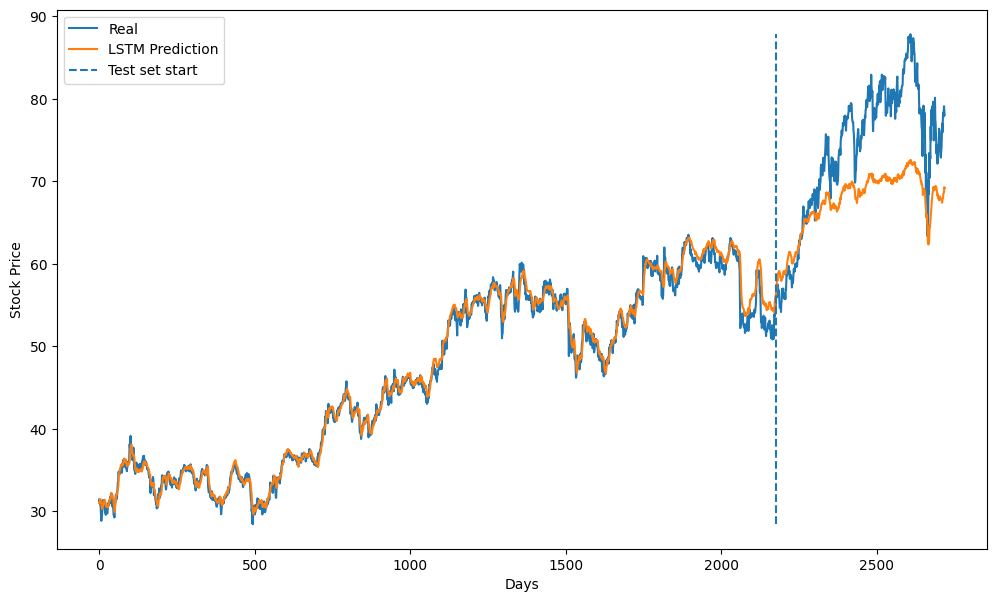

,Close_lead1,Model forecast
0,31.440840,30.987064
1,31.183207,31.077028
2,31.364504,31.262959
3,30.839695,31.454420
4,30.944656,31.447714
...,...,...
2712,77.814888,68.526230
2713,78.492363,68.580894
2714,79.103050,68.719948
2715,78.492363,69.294579


In [15]:
df_out_classical = create_prediction_df(train_val_loader,classical_model,test_loader)
df_out_classical

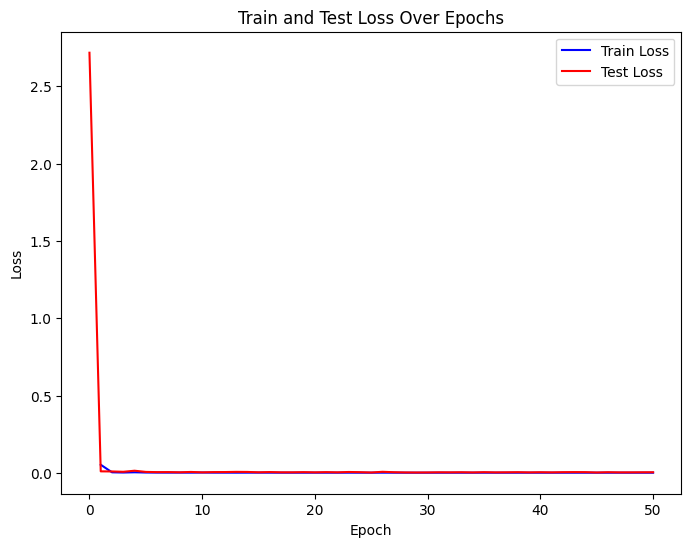

In [16]:
plot_loss(classical_loss_train, classical_loss_test)

##  Interpretability methods: Gradient-based magnitude attribution, Saliency map and LIME

### Gradient

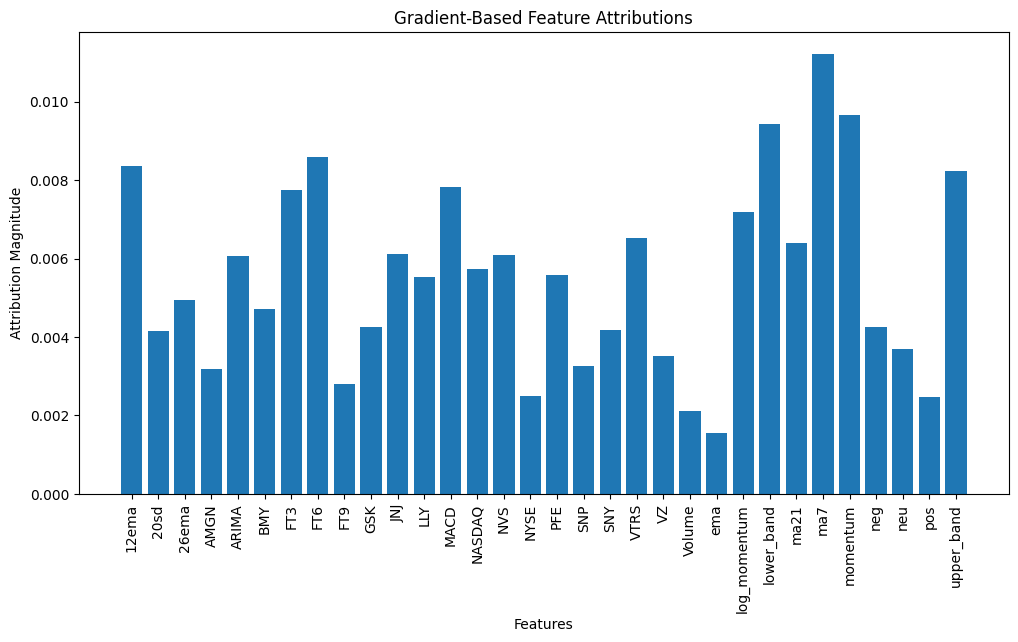

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate gradient-based attributions
def compute_gradient_attributions(model, data_loader):
    model.eval()
    all_attributions = []

    for inputs, _ in data_loader:
        inputs = inputs.requires_grad_()
        outputs = model(inputs)
        
        # Compute gradients of the output w.r.t. inputs
        outputs.backward(torch.ones_like(outputs))
        
        # Compute absolute values of gradients and sum over sequence dimension for each feature
        gradients = inputs.grad.abs().mean(dim=1).detach().cpu().numpy()
        
        all_attributions.append(gradients)

    # Average attributions over all batches
    avg_attributions = np.mean(np.vstack(all_attributions), axis=0)
    return avg_attributions

# Plot function for attributions
def plot_attributions(attributions, feature_names):
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(feature_names)), attributions)
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Attribution Magnitude")
    plt.title("Gradient-Based Feature Attributions")
    plt.show()

attributions = compute_gradient_attributions(classical_model, test_loader)
plot_attributions(attributions, features)


### Saliency maps

### Global saliency map 

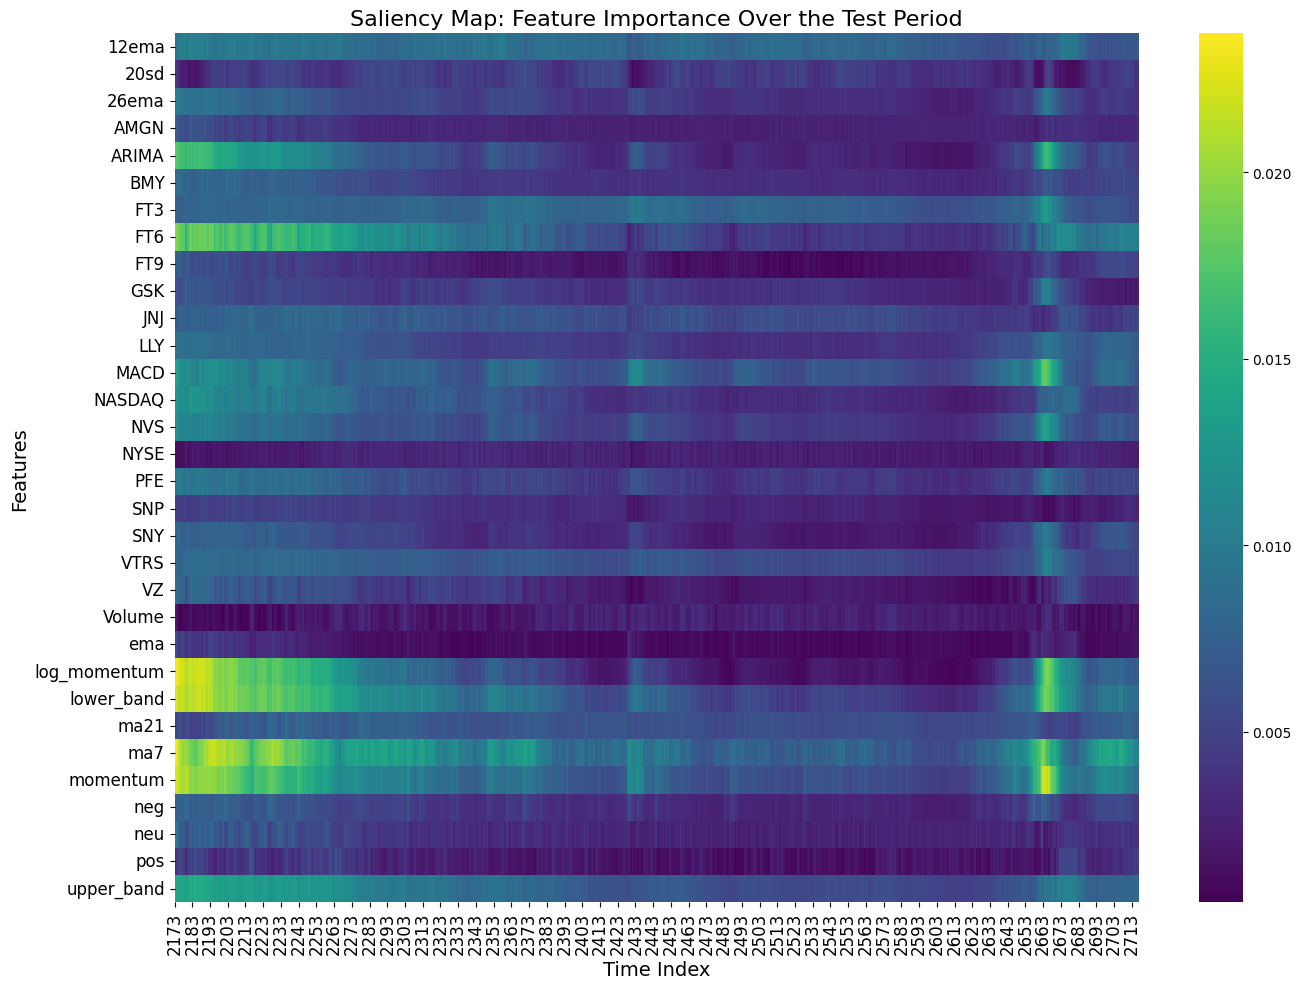

In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_saliency_map_for_test_period(model, data_loader):
    """
    Generates the saliency map for the entire test period.
    model: The trained PyTorch model.
    data_loader: DataLoader object for the test set.
    return: Aggregated saliency maps for the entire test set, shape (n_test_samples, sequence_length, n_features).
    """
    model.eval()
    saliency_maps = []
    all_inputs = []

    for inputs, _ in data_loader:
        inputs = inputs.requires_grad_()  # Enable gradient tracking for inputs
        outputs = model(inputs)
        
        # Compute gradients of outputs with respect to inputs
        outputs.backward(torch.ones_like(outputs))
        
        # Get the absolute value of the gradients (saliency)
        saliency = inputs.grad.abs().detach().cpu().numpy()
        saliency_maps.append(saliency)
        all_inputs.append(inputs.detach().cpu().numpy())

    # Concatenate saliency maps across all batches (for the entire test period)
    saliency_maps = np.concatenate(saliency_maps, axis=0)
    all_inputs = np.concatenate(all_inputs, axis=0)

    return saliency_maps, all_inputs

def plot_saliency_map_over_test_period(saliency_maps, feature_names, test_indices, tick_interval=10):
    """
    Plots the saliency map for 32 features over the entire test period with improved readability for the time axis.
    
    saliency_maps: Aggregated saliency maps.
    feature_names: List of feature names corresponding to the 32 features.
    test_indices: The time indices corresponding to the test period (e.g., 2173 to 2717).
    tick_interval: The interval at which to display X-axis (time index) ticks for better readability.
    """
    avg_saliency = saliency_maps.mean(axis=1)  # Average saliency over sequence length, shape: (n_test_samples, n_features)
    
    plt.figure(figsize=(14, 10))
    
    # Plot saliency map as a heatmap over the test period
    sns.heatmap(avg_saliency.T, cmap='viridis', annot=False, cbar=True)
    plt.title('Saliency Map: Feature Importance Over the Test Period', fontsize=16)
    plt.xlabel('Time Index', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    
    # Set X-axis ticks at intervals (to make it less crowded)
    xtick_positions = np.arange(0, len(test_indices), tick_interval)
    xtick_labels = test_indices[::tick_interval]
    
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=90, fontsize=12)  
    plt.yticks(ticks=np.arange(len(feature_names)) + 0.5, labels=feature_names, rotation=0, fontsize=12)
    
    plt.tight_layout()
    plt.show()

saliency_maps_test, _ = generate_saliency_map_for_test_period(classical_model, test_loader)

test_indices = np.arange(2173, 2717)  


# Plot the saliency map for 32 features over the entire test period
plot_saliency_map_over_test_period(saliency_maps_test, features, test_indices)


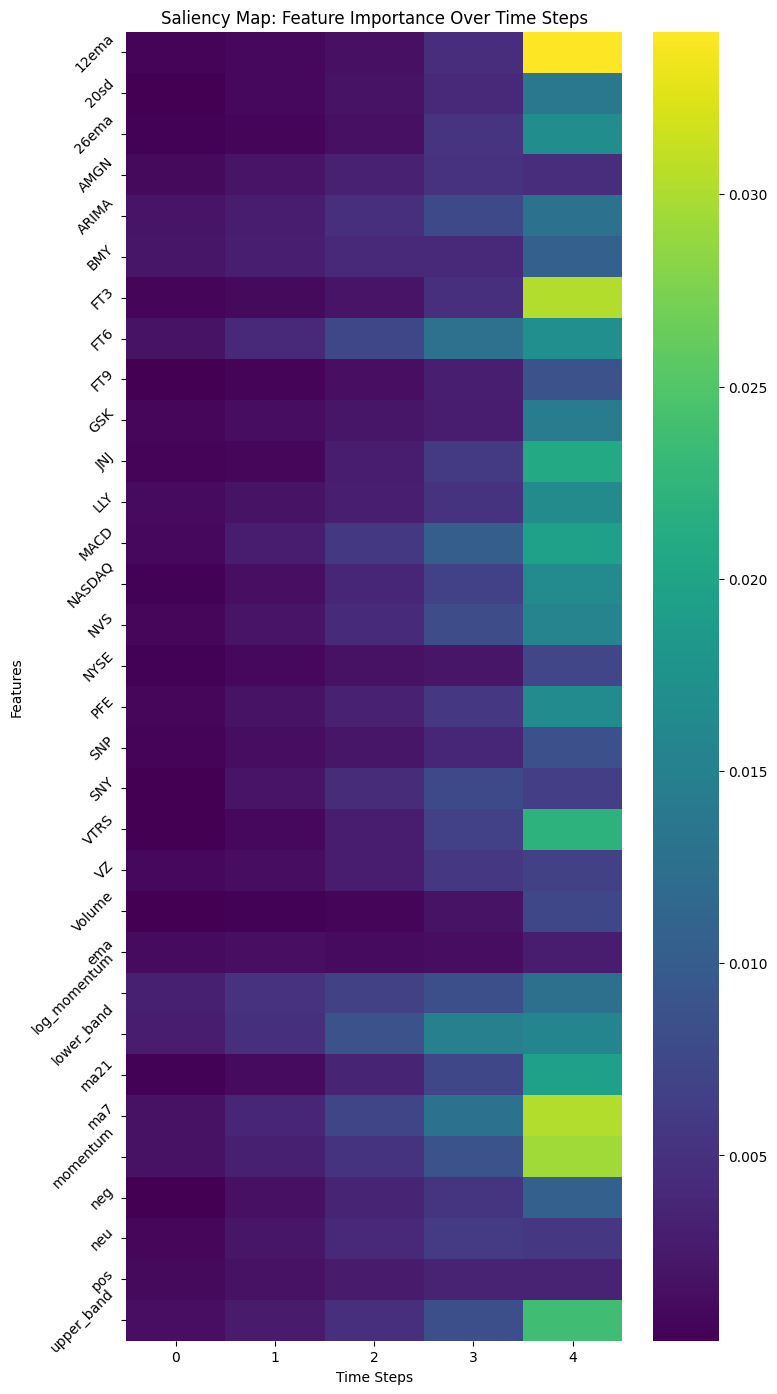

In [59]:
# Function to plot the saliency map for each feature over time
def plot_saliency_map(saliency_maps, feature_names, timestep_axis=True):
    """
    Plots saliency maps for each feature over the time steps.
    """
    avg_saliency = saliency_maps.mean(axis=0)  # Average over all samples (sequence_length, num_features)
    
    plt.figure(figsize=(8,17))
    
    if timestep_axis:
        # Heatmap for feature importance over time steps
        sns.heatmap(avg_saliency.T, cmap='viridis', annot=False, cbar=True)
        plt.title('Saliency Map: Feature Importance Over Time Steps')
        plt.xlabel('Time Steps')
        plt.ylabel('Features')
        plt.xticks(ticks=np.arange(avg_saliency.shape[0]) + 0.5, labels=np.arange(avg_saliency.shape[0]))
        plt.yticks(ticks=np.arange(len(feature_names)) + 0.5, labels=feature_names, rotation = 45)
    else:
        # Bar plot for aggregated feature importance over all time steps
        feature_importance = avg_saliency.sum(axis=0)  
        plt.barh(np.arange(len(feature_names)), feature_importance)
        plt.yticks(ticks=np.arange(len(feature_names)), labels=feature_names)
        plt.title('Aggregated Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Features')

    plt.show()
plot_saliency_map(saliency_maps_test, features, timestep_axis=True)



### Comprehensive Analysis of Saliency Maps

The saliency maps provide insights into how various features contribute to the model's predictions in both long-term (across period of testing data) and short-term (within each sequence on average). Here's a breakdown of the behavior of each feature across both temporal contexts:

#### 1. **Technical Indicators**:
   - **12ema (Exponential Moving Average)**:
     - **Over the Testing Period**: The 12ema shows consistent and significant importance across the period with moderate level. Its contribution becomes more significant in periods of market trend shifts. 
     - **Within a Sequence**: During short-term sequences, the importance of 12ema gradually increases which showing that ema effectively capturing price trends over time. 
   
   - **26ema**:
     - **Over the Testing Period**: This feature follows a similar pattern to 12ema but with less overall magnitude as shown in the darker color, that indicates the shorter 12-period EMA has more weight in shaping predictions.
     - **Within a Sequence**: 26ema also grows in importance as the sequence progresses, but its contribution remains lower than 12ema. 
   
   - **ma7 (7-day Moving Average) and ma21 (21-day Moving Average)**:
     - **Over the Testing Period**: Both moving averages are crucial for smoothing out price fluctuations and detecting trends. However, ma7 shows higher impact across the testing period, especially in an early time of the testing sequence.On the other hand, while lower impact in the beginning, the ma21 increases the importance as sequence proceeded.  
     - **Within a Sequence**:Both features tend to be have more impact toward the end of sequences showing that they are used more heavily in forecasting the last few days in a time window.

#### 2. **Momentum and Volatility Indicators**:
   - **Log Momentum**, **momentum**:
     - **Over the Testing Period**: Log momentum and momentum features play a significant role throughout the testing sequences that supports to measure the strength of upward or downward movements, particularly both share same pattern of very high impact on early stage and then slightly decrease in the middle then increase importance at the end of the sequence.
     - **Within a Sequence**: Its importance builds up within the sequence and peaks near the last time steps, suggesting that momentum is a crucial factor for predicting the near term features.
   
   - **Lower/Upper Bands**:
     - **Over the Testing Period**:The volatility bands (lower_band, upper_band) display stable roles, especially during periods of sharp price movements. These features help the model to adjust its predictions volume of the market conditions.
     - **Within a Sequence**: Both features show a rise in contributing to prediction at later time steps, indicating essence on the price prediction within short window. 

#### 3. **Market Indices**:
   - **NASDAQ, NYSE**:
     - **Over the Testing Period**: NASDAQ (National Association of Securities Dealers Automated Quotations) and NYE (New York stock exchange), these indices contribute consistently but with moderate-high importance, with NASDAQ showing higher importance. They provide context for overall market direction but do not dominate predictions.
     - **Within a Sequence**: The indices maintain a steady importance throughout the sequence, suggesting that the model uses them as background indicators for general market conditions rather than primary drivers of individual stock price predictions.

#### 4. **Volume and Sentiment Features**:
   - **Volume**:
     - **Over the Testing Period**: Volume has a low impact throughout the test period which reflect that this feature does not contribute much to the model’s predictions.
     - **Within a Sequence**: Similarly, within sequences, the importance of volume remains low and does not fluctuate much, indicating that the model does not rely heavily on trading volumes for short-term predictions.
   
   - **Pos, Neg, Neu (Sentiment Features)**:
     - **Over the Testing Period**: Sentiment features (positive, negative, neutral) do not bring any insight to the model prediction, as those features display dark color thourghout the map. 
     - **Within a Sequence**: Like volume, these features maintain consistently low importance across all time steps in a sequence. 

#### 5. **Stock-Specific Features**:
   - **AMGN, JNJ, LLY, PFE, VZ, GSK, NVS, SNY**:
     - **Over the Testing Period**: Stock-specific features are often the stock information of specific companies in the related field. Those features show less importance overall, with some variations. Certain stocks like **AMGN** and **JNJ** exhibit mild spikes in importance during specific intervals, indicating that the model sometimes refers to stock-specific data, but not consistently.
     - **Within a Sequence**: In short-term sequences, these features maintain a low and stable importance, indicating that stock-specific information is not crucial for making predictions in this context.
   
   - **ARIMA**:
     - **Over the Testing Period**: ARIMA shows fluctuating importance. The spikes could suggest that the model leverages ARIMA for specific, short-lived market conditions.
     - **Within a Sequence**: Within short sequences, ARIMA's importance increases in the last time steps, indicating that it is particularly useful for capturing immediate trends for short windows of time.

#### 6. **Other Features**:
   - **FT3, FT6, FT9**:
     - **Over the Testing Period**: Those are ofen call the time-lagged features, these financial technical features contribute moderately throughout the test period, with **FT6** and **FT3** showing a noticeable peak in importance during specific time intervals. This suggests their relevance in forecasting price trends under certain conditions.
     - **Within a Sequence**: The importance of these features rises toward the end of sequences, similar to the momentum indicators, highlighting their role in predicting short-term price movements.
   
   - **MACD (Moving Average Convergence Divergence)**:
     - **Over the Testing Period**: MACD displays moderate importance, especially during periods of market trend changes. It assists the model in identifying shifts in momentum.
     - **Within a Sequence**: Within sequences, MACD’s importance rises toward the end, suggesting its utility in determining short-term trend reversals.


### Summary of the Combined Analysis:
Both the global saliency map (over 500 days) and the short-term sequence-based saliency map (5 time steps) confirm the dominant role of **technical indicators** like **12ema, ma7, ma21, and log_momentum** in the model's predictions. These indicators show consistent importance across both long-term and short-term contexts, reflecting their ability to capture market trends and momentum effectively.

Stock-specific features and volume/sentiment data, on the other hand, play minor roles, contributing partially or remaining consistently low in importance across both contexts. This suggests that the model primarily focuses on broader technical analysis rather than individual stock behavior or external sentiment data.

In short-term sequences, momentum and volatility-related indicators (e.g., **log_momentum, lower_band, upper_band**) become increasingly important as the model predicts price movements over shorter horizons. This reinforces their role in capturing immediate market conditions.

### LIME

Understanding LIME (Local Interpretable Model-Agnostic Explanations)

**LIME** is a model-agnostic tool used to explain individual predictions of any machine learning model. It works by approximating a complex model locally around a given instance with a simpler, interpretable model 

How LIME Works:
1. **Perturbs Data**: LIME generates perturbed samples from the original input data.
2. **Local Approximation**: It then uses the complex model to predict on these perturbed samples and fits a simpler, interpretable model (e.g., linear regression) to approximate the behavior of the complex model for that specific instance.

Key Concepts:
- **Positive/Negative Contributions**: Features with positive contributions push the prediction towards the predicted class, while negative contributions push it away.
- **Feature Importance**: The size of the feature’s contribution (visualized as bars) indicates its importance in the model’s decision for that instance.

Applying LIME for Specific Groups of Samples:
- LIME can be applied to **specific groups of samples** (e.g., a time period of interest in time series data).
- **Aggregating Explanations**: When applied to a group (e.g., 50 samples), LIME generates local explanations for each sample, which can be averaged to understand which features are consistently important across that period.

Benefits:
- **Model-Agnostic**: Works with any model, providing local explanations.
- **Feature Insights**: Helps in identifying key features driving individual predictions, aiding in model debugging and building trust.

LIME is particularly useful when explaining predictions in high-stakes areas like finance, healthcare, or autonomous systems, and can be applied effectively to time series data by analyzing feature importance over specific time windows.

References: M. T. Ribeiro, S. Singh, and C. Guestrin, “Why should I trust you?: Explaining the predictions of any classifier,” in Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, San Francisco, CA, USA, Aug. 2016, pp. 1135–1144.

In [21]:
import lime
import lime.lime_tabular
import torch
import numpy as np

def model_predict(input_data):
    """Define the prediction function for LIME, matching the expected input/output

    Args:
        input_data: data lodaer

    Returns:
        numpy array: prediction from model 
    """    
    input_tensor = torch.tensor(input_data, dtype=torch.float32)
    
    # Set the model to evaluation mode and make predictions
    classical_model.eval()
    with torch.no_grad():
        output = classical_model(input_tensor)
    
    return output.numpy()  # Return as a 2D numpy array for regression

# Prepare data for LIME in 3D format as required by your SequenceDataset and LSTM model
# Fetch data from train_loader and format as needed
X_train_list, y_train_list = [], []
for X_batch, y_batch in train_val_loader:
    X_train_list.append(X_batch.numpy())
    y_train_list.append(y_batch.numpy())

# Convert to numpy arrays
X_train_l = np.concatenate(X_train_list)
y_train_l = np.concatenate(y_train_list)

# RecurrentTabularExplainer requires a 3D array (n_samples, sequence_length, num_features) with regression mode for forecasting
explainer = lime.lime_tabular.RecurrentTabularExplainer(
    X_train_l, 
    training_labels=y_train, 
    feature_names=features, 
    discretize_continuous=True,
    mode='regression',  
    discretizer='decile'
)

X_test_list, _ = next(iter(test_loader))
X_test_s = X_test_list.numpy()

# Create sample explanation for data with index 50th from the test data. 
instance_idx = 50
exp = explainer.explain_instance(
    X_test_s[instance_idx], 
    model_predict, 
    num_features=32 
)



# Print the explanation details
print("LIME Explanation Details:")
print(exp.as_list())



LIME Explanation Details:
[('NASDAQ_t-0 > 1.19', 0.04341980580945576), ('0.86 < ma7_t-0 <= 0.96', 0.034539642920627715), ('0.84 < momentum_t-0 <= 0.93', 0.024735180840163254), ('0.84 < ARIMA_t-0 <= 0.93', 0.02399836297204942), ('VZ_t-0 > 0.88', -0.020739606974257693), ('0.86 < ma7_t-1 <= 0.96', 0.018744230944987155), ('0.88 < log_momentum_t-0 <= 0.95', 0.018420989419473992), ('0.89 < 26ema_t-0 <= 0.99', 0.01840375133859491), ('0.86 < upper_band_t-0 <= 0.94', 0.018217189936902273), ('AMGN_t-0 > 0.99', 0.01740233923525722), ('0.88 < 12ema_t-0 <= 0.98', 0.017368151234480062), ('0.84 < lower_band_t-0 <= 0.93', 0.01663483254881887), ('0.88 < FT6_t-0 <= 0.95', 0.01565112113304948), ('0.84 < ARIMA_t-1 <= 0.93', 0.015617627804232271), ('0.84 < momentum_t-1 <= 0.93', 0.014277899501262847), ('FT3_t-0 > 1.02', -0.012623138752362761), ('SNP_t-0 > 1.11', 0.012111790641310075), ('0.86 < ma7_t-2 <= 0.96', 0.011177399312986915), ('0.88 < log_momentum_t-3 <= 0.95', 0.010377776880910407), ('NASDAQ_t-2 >

In [22]:
# Prepare data for LIME in the correct format. Fetch all data from test_loader and concatenate the batches
X_test_list_full, y_test_list_full = [], []
for X_batch, y_batch in test_loader:
    X_test_list_full.append(X_batch.numpy())
    y_test_list_full.append(y_batch.numpy())

# Convert to numpy arrays and concatenate the batches into full datasets
X_test_full = np.concatenate(X_test_list_full)
y_test_full = np.concatenate(y_test_list_full)

# Define start and end index 100 and 227 from the full dataset
t_start = 100  
t_end = 227   

# Slice the instances from the entire test set, not just a single batch
instances_to_explain = X_test_full[t_start:t_end]

# Initialize the RecurrentTabularExplainer for the regression model
explainer = lime.lime_tabular.RecurrentTabularExplainer(
    X_train_l, 
    training_labels=y_train_l, 
    feature_names=features, 
    discretize_continuous=True,
    mode='regression',
    discretizer='decile'
)

# Function to apply LIME over multiple instances and aggregate results
def aggregate_lime_explanations(instances, explainer, model_predict, num_features=32):
    explanation_df = pd.DataFrame()

    for instance in instances:
        exp = explainer.explain_instance(instance, model_predict, num_features=num_features)
        exp_dict = dict(exp.as_list())
        explanation_df = explanation_df._append(exp_dict, ignore_index=True)
    
    # Aggregate results by calculating the mean contribution for each feature
    mean_contributions = explanation_df.mean().sort_values(ascending=True)
    return mean_contributions

# Apply LIME to each instance in the decline period and aggregate the explanations
mean_contributions = aggregate_lime_explanations(instances_to_explain, explainer, model_predict)

print("Aggregated Feature Contributions During Decline Period:")




Aggregated Feature Contributions During Decline Period:


In [23]:
import pandas as pd

# Temporarily set the option to display all rows
with pd.option_context('display.max_rows', None):
    print(mean_contributions)


NVS_t-0 > 0.81              -0.019773
VZ_t-0 > 0.88               -0.016826
FT3_t-0 > 1.02              -0.015671
0.76 < NVS_t-0 <= 0.81      -0.013384
0.67 < BMY_t-1 <= 0.75      -0.012312
12ema_t-4 > 0.98            -0.010977
NVS_t-1 > 0.81              -0.010122
NVS_t-2 > 0.81              -0.009873
neg_t-0 > 0.28              -0.009801
0.75 < BMY_t-1 <= 0.81      -0.009787
0.76 < NVS_t-1 <= 0.81      -0.009770
BMY_t-2 > 0.81              -0.009566
BMY_t-1 > 0.81              -0.009543
VZ_t-1 > 0.88               -0.009428
JNJ_t-3 > 1.07              -0.009289
JNJ_t-2 > 1.07              -0.008942
NVS_t-3 > 0.81              -0.008936
NASDAQ_t-4 > 1.19           -0.008877
lower_band_t-4 > 0.93       -0.008734
0.57 < BMY_t-1 <= 0.67      -0.008560
0.35 < MACD_t-0 <= 0.43     -0.008544
JNJ_t-4 > 1.07              -0.008370
0.57 < BMY_t-3 <= 0.67      -0.008255
neg_t-1 > 0.28              -0.008143
0.67 < BMY_t-2 <= 0.75      -0.007923
JNJ_t-1 > 1.07              -0.007879
0.35 < MACD_

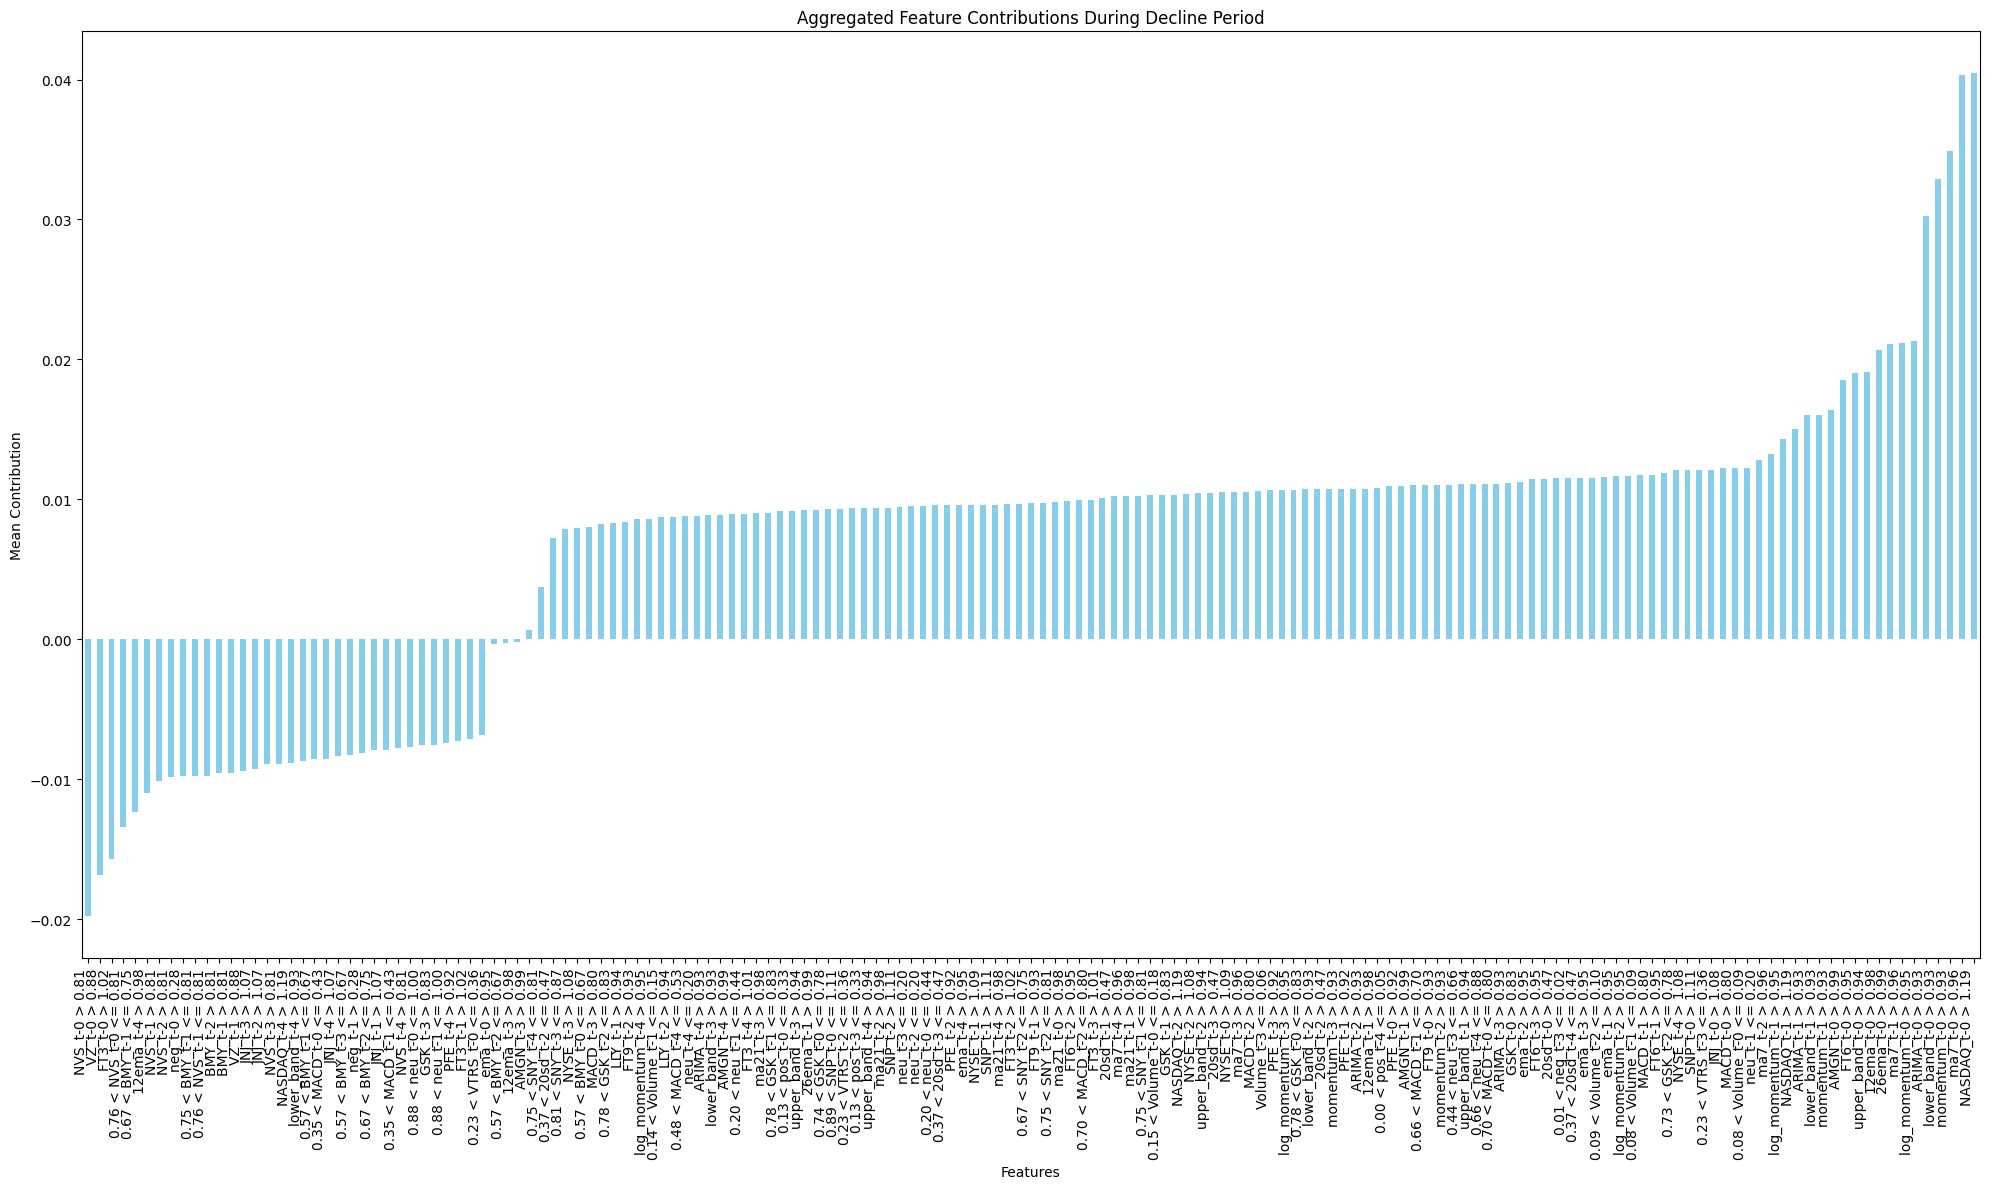

In [24]:
def plot_aggregated_contributions(mean_contributions):
    plt.figure(figsize=(20, 12))
    mean_contributions.plot(kind='bar', color='skyblue')
    plt.title('Aggregated Feature Contributions During Decline Period')
    plt.xlabel('Features')
    plt.ylabel('Mean Contribution')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
plot_aggregated_contributions(mean_contributions)

### Analysis of Aggregated Feature Contributions for 100 Instances During Decline Period
As in the predicted plot from the classical LSTM model I can notice there is a period where the prediction start declining, which can be demonstrated as bigger gap between the forecast and true values. After running LIME and aggregate feature contribution for 100 instances (index of the start instance is just before the decreased period a little bit, till index of record with index of 2237). The result of analysis is then plotted and are ranked by their average contribution to the model’s prediction, with positive values pushing the prediction up and negative values pushing it down. 

### Key Observations:
Here’s a more concise analysis based on the LIME results:

### **Key Negative Features**:
- **NVS_t-0 > 0.81** (-0.019): Strongest negative impact, indicating higher `NVS` values lead to lower stock price predictions.
- **VZ_t-0 > 0.88** (-0.016) and **FT3_t-0 > 1.02** (-0.015): Similar negative effects, suggesting these features correlate with lower price predictions.

### **Key Positive Features**:
- **NASDAQ_t-0 > 1.19** (0.040) and **ma7_t-0 > 0.96** (0.040): Strongest positive contributions, suggesting higher NASDAQ values and 7-day moving average drive higher price predictions.
- **Momentum_t-0 > 0.93** (0.035): Momentum is also a key positive driver, linked to rising stock prices.

### **Patterns**:
- **Moving Averages** (`ma7`, `ema`, etc.) consistently show positive contributions across multiple time steps.
- **Stock-Specific Features** like `NVS` and `VZ` have mixed impacts, negative at higher thresholds.

### **Conclusion**:
- **Broader market indicators** (NASDAQ, moving averages) are strong drivers of price increases.
- **Individual stocks** (e.g., NVS, VZ) negatively influence predictions when their values exceed certain thresholds.
- **Momentum and volume** play key roles, with momentum often signaling positive price changes.

This shows a balance between **market-wide indicators** and **individual stock features** in your model’s predictions.


# Drop some feature then train again 
Based on the Gradient Based Attributions, Saliency map and LIME,  I decide to drop out some features which doesn't have high positive impact on the model performance out, those including neg, pos, neu, NVS and VZ as across these techniques those features either shows low impact or negatively contribute to prediction. 

In [91]:

features_to_drop = ['neg','pos', 'neu','NVS','VZ']

# Drop features from the scaled data frames for training, validation, and testing
df_train_scaled_dropped = df_train_scaled.drop(columns=features_to_drop)
df_val_scaled_dropped = df_val_scaled.drop(columns=features_to_drop)
df_test_scaled_dropped = df_test_scaled.drop(columns=features_to_drop)

torch.manual_seed(101)

# Update the list of features after dropping the specific features
updated_features = [feature for feature in features if feature not in features_to_drop]

# Create datasets with the updated data
train_dataset_dropped = TimeSeriesDataset(
    df_train_scaled_dropped,
    target=target,
    features=updated_features,
    sequence_length=sequence_length
)

val_dataset_dropped = TimeSeriesDataset(
    df_val_scaled_dropped,
    target=target,
    features=updated_features,
    sequence_length=sequence_length
)

test_dataset_dropped = TimeSeriesDataset(
    df_test_scaled_dropped,
    target=target,
    features=updated_features,
    sequence_length=sequence_length
)

# Create DataLoaders for the modified datasets
batch_size = 128  # Adjust batch size as needed
train_loader_dropped = DataLoader(train_dataset_dropped, batch_size=batch_size, shuffle=True)
val_loader_dropped = DataLoader(val_dataset_dropped, batch_size=batch_size, shuffle=False)
test_loader_dropped = DataLoader(test_dataset_dropped, batch_size=batch_size, shuffle=False)

# Example to check new data shapes
X_sample_drop, y_sample_drop = next(iter(train_loader_dropped))
print("Features shape after dropping:", X_sample_drop.shape)
print("Target shape:", y_sample_drop.shape)


Features shape after dropping: torch.Size([128, 5, 27])
Target shape: torch.Size([128])


In [88]:

new_model = SimpleLSTM(num_sensors=len(updated_features), hidden_units=HIDDEN_UNITS)
loss_function_new = nn.MSELoss()
optimizer_new = torch.optim.Adagrad(new_model.parameters(), lr=LEARNING_RATE)


In [92]:
len(updated_features)

27

In [93]:
classical_loss_train_new = []
classical_loss_test_new = []
print("Untrained test\n--------")
val_loss_new = val_model(test_loader_dropped, new_model, loss_function_new)
print()
classical_loss_test_new.append(val_loss_new)

for ix_epoch in range(50):
    print(f"Epoch {ix_epoch}\n---------")
    train_loss_new = train_model(train_loader_dropped, new_model, loss_function_new, optimizer=optimizer_new)
    val_loss_new = val_model(val_loader_dropped, new_model, loss_function_new)
    print()
    classical_loss_train_new.append(train_loss_new)
    classical_loss_test_new.append(val_loss_new)

Untrained test
--------
Test loss: 0.05291785984300077

Epoch 0
---------
Train loss: 0.0006208389260185261
Test loss: 0.0017096372321248055

Epoch 1
---------
Train loss: 0.0006156438981027653
Test loss: 0.001104229362681508

Epoch 2
---------
Train loss: 0.0005697458361585935
Test loss: 0.0022464192976864674

Epoch 3
---------
Train loss: 0.0005718906739881883
Test loss: 0.0011480339259530108

Epoch 4
---------
Train loss: 0.0005535844771657139
Test loss: 0.0018532653145181637

Epoch 5
---------
Train loss: 0.0005384881204615037
Test loss: 0.0018756049297129114

Epoch 6
---------
Train loss: 0.0005236301047261804
Test loss: 0.0017993909617265065

Epoch 7
---------
Train loss: 0.0005173792014829814
Test loss: 0.0012683003345349182

Epoch 8
---------
Train loss: 0.0005416894913651049
Test loss: 0.001525918982224539

Epoch 9
---------
Train loss: 0.0005272154929116368
Test loss: 0.0011445285636000335

Epoch 10
---------
Train loss: 0.0006017093798921754
Test loss: 0.001299505733186379



In [94]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Drop specified features from the scaled datasets
df_train_scaled_dropped = df_train_scaled.drop(columns=features_to_drop)
df_val_scaled_dropped = df_val_scaled.drop(columns=features_to_drop)
df_test_scaled_dropped = df_test_scaled.drop(columns=features_to_drop)

# Concatenate training and validation datasets after dropping features
df_train_val_dropped = pd.concat([df_train_scaled_dropped, df_val_scaled_dropped])

# Create a DataLoader for the concatenated training and validation set with dropped features
train_val_dataset_drop = TimeSeriesDataset(df_train_val_dropped, target=target, features=updated_features, sequence_length=sequence_length)
train_val_loader_drop = DataLoader(train_val_dataset_drop, batch_size=batch_size, shuffle=False)

# Create a DataLoader for the modified test set
test_dataset_dropped = TimeSeriesDataset(df_test_scaled_dropped, target=target, features=updated_features, sequence_length=sequence_length)
test_loader_dropped = DataLoader(test_dataset_dropped, batch_size=batch_size, shuffle=False)


Mean Squared Error (MSE): 11.1951
R-squared (R²): 0.9481
Mean Absolute Percentage Error (MAPE): 2.52%


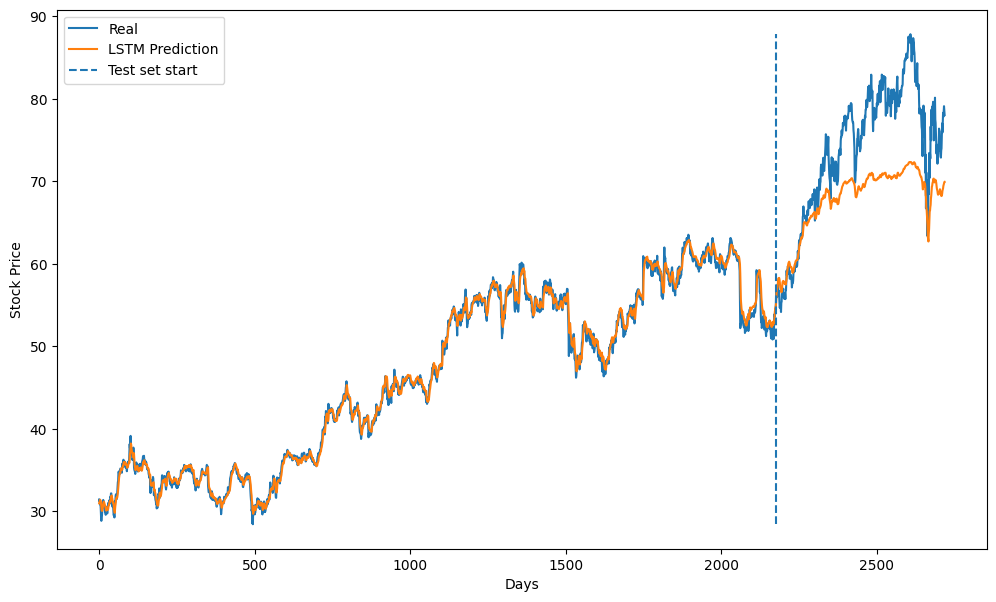

In [95]:
df_out_classical_new = create_prediction_df(train_val_loader_drop,new_model,test_loader_dropped)

In [96]:
df_out_classical_new

,Close_lead1,Model forecast
0,31.440840,30.971361
1,31.183207,31.161736
2,31.364504,31.235043
3,30.839695,31.411091
4,30.944656,31.319595
...,...,...
2712,77.814888,69.450439
2713,78.492363,69.583252
2714,79.103050,69.735924
2715,78.492363,69.907326


Following the removal of these columns, I retrained the model with the new dataset, and the model's performance improved noticeably. The **mean squared error (MSE)** on the testing set decreased from 12.7 to 11.1, and the overall prediction accuracy increased on average of 1 to 1.5 units which is closer to actual price. This demonstrates that eliminating features that contribute negatively, or have low importance, can simplify the model and lead to better generalization. This refinement also helped reduce noise, allowing the model to focus on the most influential features for better stock price forecasting.


# enhanced Quantum Long Short-Term Memory with Linear embedding layer
Quantum Long-Short Memory (QLSTM) is a quantum adaptation version of the classical LSTM model, where the key difference is the replacement of VQCs in different
gates in the circuit. In QLSTM, the implementation of VQCs has been desmontrated to play an essential role in the extraction of feature data and compression of data, along with the accelerated learning ability and enhanced convergence. This architecture was first proposed in 2022 by Chen et al [1], QLSTM is effective in time series forecasting with regular features, but it faces limitations in qubit usage during data encoding and compression. The reason is that this model employs a one-to-one mapping, requiring (p + q) qubits to encode both hidden states (p units) and input features (q features). This leads to inefficiencies, as the output dimension must match the hidden state, resulting in wasted quantum information and reduced learning capacity. To address this, a linear-layer embedding scheme was proposed to improve qubit usage and model performance [2]. This scheme transforms input features into a target dimension using matrix multiplication, optimizing the feature encoding process.
<br>
<br>
<img src="./images/eQLSTM.png" alt="Alt text" width="500" style = "background: white"/>

The proposed model enhances this approach by employing shared embedding layers before and seperate linear mebedding after each Variational Quantum Circuit (VQC). These layers act as feature maps, transforming input data into compressed feature representations specific to each VQC, allowing the model to better capture non-linearities and the unique characteristics of the data. This strategy mirrors the gate-specific functions in traditional LSTM models, making the use of separate embedding layers more effective in capturing diverse information relevant to each quantum circuit.The feed-forward pass formulation is shown as:
<br>
<br>
<img src="./images/eQLSTMLfeedforward.png" alt="Alt text" width="400"/>

where Lb is the linear embedding layer applied to the concatenated vector, zt represents the compressed output of qt = [ht−1, xt]; ft, it, ot represent the forget, input, output gates; ˜ct, ct, ht, and yt display candidate cell state, cell state, hidden state, and output value at time step t, respectively.
σ denotes the sigmoid activation function, and ⊗ represents element-wise multiplication. {Lm} correspond to the set of linear layers applied after VQCs’s output m = (1, 2, 3, 4), Lf is a representation of the linear layer in the final computation stage of the model to get the predicted value.


--- 
<h3>VQC block</h3>

A typical Variational Quantum Circuit (VQC) block comprises three key layers: the encoding layer, the variational layer, and the measurement layer.

1) **Encoding Layer**: This layer maps classical data into quantum representation through feature mapping. In this work, both original rotation angles for single-qubit rotations (RX, RY gates) and amplitude encoding are explore to showcase the transformation of classical data into quantum state amplitudes, enabling efficient quantum processing. 
   
2) **Variational Layer**: Responsible for qubit entanglement and rotation, this layer performs complex non-linear mappings, crucial for enhancing the prediction accuracy of quantum machine learning models. In this work both CNOT and CRX variational gates will be applied to compared the efficacy. 

3) **Measurement Layer**: After computation, this layer measures the quantum state, generating a vector for classical post-processing. Simulations in quantum software compute this without noise for predictions.


### Training enhanced QLSTM with Amplitude Embedding and Variational layer with the usage of CRX
**Amplitude embedding** is a technique that encode classical data into corresponding amplitudes of a quantum state. Given a classical N-dimensional datapoint, it is normalized and mapped to a quantum state with n qubits, where N = 2^n. The data is encoded in the amplitude of each computational basis state. For example, a classical data point can be represented as a linear combination of quantum states, where each element of the vector corresponds to the amplitude of a quantum state. The amplitude embedding method allows for efficient encoding of large datasets, as it uses the quantum state’s amplitude to represent the data. To encode multiple data points, the dataset is concatenated into a single vector, which is then normalized and embedded. The number of qubits required depends on the size of the dataset, where at least log₂(NM) qubits are needed to represent N features across M examples. As the dataset we used have 32 features which consider the large number if we use any other encoding technique, so with amplitude encoding it only requires, log2 (32) = 5 qubits

<img src="./images/amplitude_encoding.png" alt="Alt text" width="300" style = "background: white"/>

*Note: image was taken from Pennylane article on quantum embedding, refer to [this link](https://pennylane.ai/qml/glossary/quantum_embedding/).*

**CRX** In order to optimize the performance of the QLSTM, I used another gates in the variational layer to enhance the performance. This was done by incorporating controlled X-rotation (CRX) gates for improved quantum entanglement and a circuit block for better qubit connectivity. The controlled X-rotation (CRX) gate is a quantum gate used to perform a controlled rotation along the X-axis on a target qubit, conditional on the state of a control qubit. It is an extension of the RX gate, which rotates a qubit around the X-axis by a certain angle. Moreover, CRX gates allow simultaneous quantum rotations and entanglement, offering greater expressibility and entangling capability compared to CNOT gates. They also provide a larger number of parameters, enabling broader exploration of quantum states. The circuit block connects qubits in a closed loop, combining nearest-neighbor and non-local interactions. This design improves connectivity, enhances entangling capacity, and maintains low training complexity. The mathematic expression of CRX can be found in below images. 

<img src="./images/crx.png" alt="Alt text" width="400" style = "background: white"/>

*Note: image was taken from Pennylane documentation on CRX rotation, refer to [this link](https://docs.pennylane.ai/en/stable/code/api/pennylane.CRX.html).*



In [16]:
Qmodel = Simple_QLSTM_AM(num_sensors=len(features), hidden_units=HIDDEN_UNITS, n_qubits=6, variational='crx')
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(Qmodel.parameters(), lr=LEARNING_RATE)

weight_shapes = (n_qlayers, n_vrotations, n_qubits) = (1, 3, 6)


In [17]:
quantum_loss_train = []
quantum_loss_test = []
torch.manual_seed(101)
print("Untrained test\n--------")
start = time.time()
qval_loss = val_model(val_loader, Qmodel, loss_function)
end = time.time()
print("Execution time", end - start)
quantum_loss_test.append(qval_loss)

for ix_epoch in range(50):
    print(f"Epoch {ix_epoch}\n---------")
    start = time.time()
    qtrain_loss = train_model(train_loader, Qmodel, loss_function, optimizer=optimizer)
    qval_loss = val_model(val_loader, Qmodel, loss_function)
    end = time.time()
    print("Execution time", end - start)
    quantum_loss_train.append(qtrain_loss)
    quantum_loss_test.append(qval_loss)

Untrained test
--------
Test loss: 0.7369524041811625
Execution time 0.7057137489318848
Epoch 0
---------
Train loss: 0.08354950125018755
Test loss: 0.03690656367689371
Execution time 7.637063980102539
Epoch 1
---------
Train loss: 0.011198183987289667
Test loss: 0.013555850212772688
Execution time 7.862018823623657
Epoch 2
---------
Train loss: 0.005404358310624957
Test loss: 0.013155792684604725
Execution time 7.657260894775391
Epoch 3
---------
Train loss: 0.003621319169178605
Test loss: 0.009049668908119202
Execution time 7.884967803955078
Epoch 4
---------
Train loss: 0.0021866402123123406
Test loss: 0.006159315661837657
Execution time 7.946045875549316
Epoch 5
---------
Train loss: 0.0014588467737970253
Test loss: 0.003869836994757255
Execution time 7.932957410812378
Epoch 6
---------
Train loss: 0.0010205413913354278
Test loss: 0.002460931738217672
Execution time 7.665282964706421
Epoch 7
---------
Train loss: 0.0007666550770712396
Test loss: 0.001763688827243944
Execution time 

Mean Squared Error (MSE): 6.2441
R-squared (R²): 0.9710
Mean Absolute Percentage Error (MAPE): 2.00%


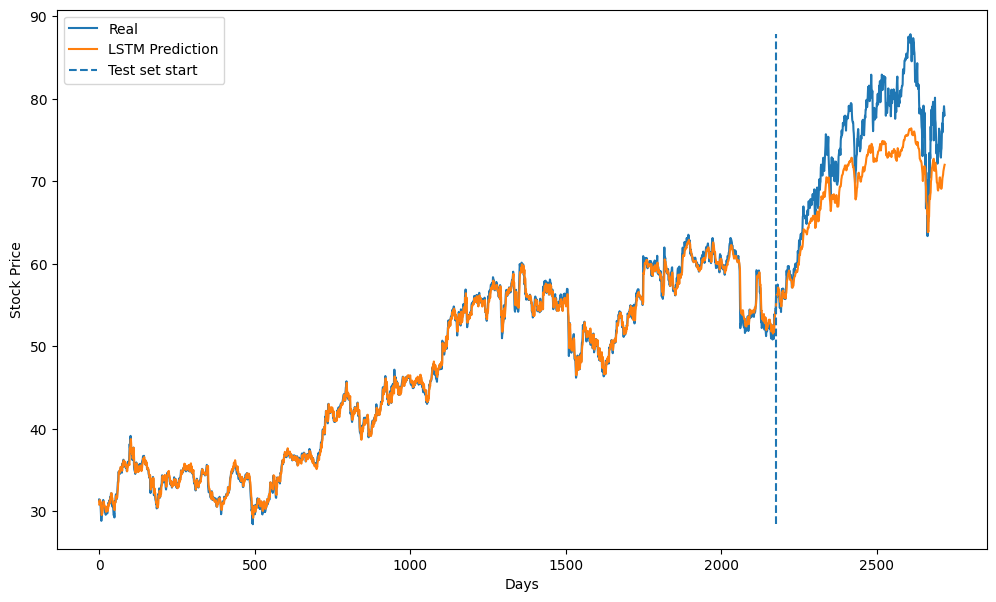

In [40]:
df_out_quantum_crx = create_prediction_df(train_val_loader,Qmodel,test_loader)

In [41]:
df_out_quantum_crx

,Close_lead1,Model forecast
0,31.440840,30.842073
1,31.183207,31.306717
2,31.364504,31.115913
3,30.839695,31.354319
4,30.944656,31.006390
...,...,...
2712,77.814888,71.227882
2713,78.492363,71.454422
2714,79.103050,71.706474
2715,78.492363,71.850189


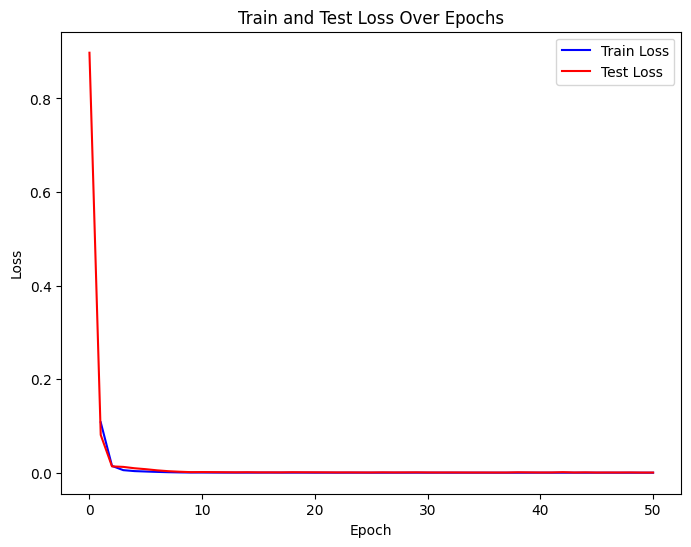

In [44]:
plot_loss(quantum_loss_train,quantum_loss_test)

## Different variational gates. 
With the same encoding techniques which is amplitude encoding, this time the original variational gate will be applied in order to compare the performance of the quantum model. The CNOT gates and single-qubit rotation gates are used, specifically the CNOT gates are applied cyclically to pairs of qubits with fixed adjacency, generating multi-qubit entanglement. This entanglement is crucial for capturing complex correlations in the quantum system. Alongside, single-qubit rotation gates with rotation angles {αi, βi, γi} are applied along the x, y, and z axes, respectively. These angles are not predetermined; they are updated iteratively during the optimization process using a gradient descent method. The depth of this quantum layer, indicating how many times the gates repeat, is set to 2 in this study, allowing the model to learn intricate patterns with more variational parameters. This combination of CNOT gates and rotation gates plays a key role in enhancing the predictive performance of the quantum circuit.

In [62]:
Qmodel_cnot = Simple_QLSTM_AM(num_sensors=len(features), hidden_units=HIDDEN_UNITS, n_qubits=6, variational='cnot')
loss_function2 = nn.MSELoss()
optimizer2 = torch.optim.Adam(Qmodel_cnot.parameters(), lr=LEARNING_RATE)

weight_shapes = (n_qlayers, n_vrotations, n_qubits) = (1, 3, 6)


In [37]:
quantum_loss_train_cnot = []
quantum_loss_test_cnot = []
torch.manual_seed(101)
print("Untrained test\n--------")
start = time.time()
qval_loss_cnot = val_model(val_loader, Qmodel_cnot, loss_function2)
end = time.time()
print("Execution time", end - start)
quantum_loss_test.append(qval_loss_cnot)

for ix_epoch in range(50):
    print(f"Epoch {ix_epoch}\n---------")
    start = time.time()
    qtrain_loss_cnot = train_model(train_loader, Qmodel_cnot, loss_function, optimizer=optimizer2)
    qval_loss_cnot = val_model(val_loader, Qmodel_cnot, loss_function)
    end = time.time()
    print("Execution time", end - start)
    quantum_loss_train.append(qtrain_loss_cnot)
    quantum_loss_test.append(qval_loss_cnot)

Untrained test
--------
Test loss: 0.27487877508004505
Execution time 0.4350461959838867
Epoch 0
---------
Train loss: 0.02812520833685994
Test loss: 0.013938832407196363
Execution time 5.104519844055176
Epoch 1
---------
Train loss: 0.004884709681694706
Test loss: 0.01045802483956019
Execution time 5.056661128997803
Epoch 2
---------
Train loss: 0.0029561162771036226
Test loss: 0.007854694034904242
Execution time 5.0200886726379395
Epoch 3
---------
Train loss: 0.0021960102021694183
Test loss: 0.006925883470103145
Execution time 4.839905023574829
Epoch 4
---------
Train loss: 0.0016128450166434049
Test loss: 0.003852599300444126
Execution time 4.915431976318359
Epoch 5
---------
Train loss: 0.0011323959411432345
Test loss: 0.002574724106428524
Execution time 4.898058891296387
Epoch 6
---------
Train loss: 0.0008226388948969543
Test loss: 0.0020558007527142763
Execution time 5.19484806060791
Epoch 7
---------
Train loss: 0.0007448501302860678
Test loss: 0.0018092187820002437
Execution 

Mean Squared Error (MSE): 8.2032
R-squared (R²): 0.9620
Mean Absolute Percentage Error (MAPE): 2.34%


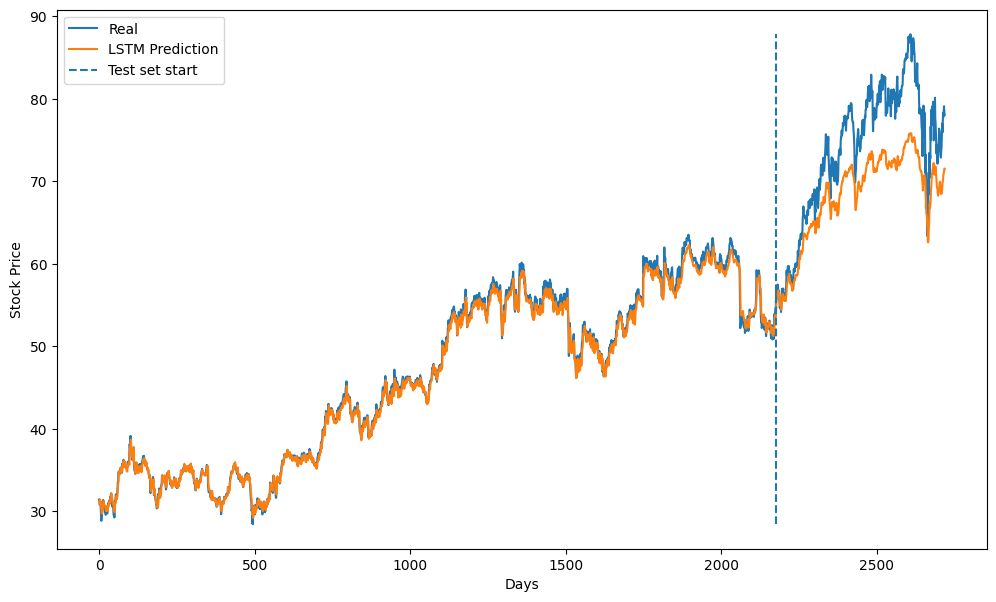

In [38]:
df_out_quantum_cnot = create_prediction_df(train_val_loader,Qmodel_cnot,test_loader)

## Different encoding - 2N rotation angles (Rotation-X then Rotation-Y gates) and CRX in variational layer
In this part the original encoding scheme is applied following the formula and code of the original paper, however the implementation is different as shared inear embedding layer is used before the VQC block and seperate linear embedidng layer is used after the VQC computation process to remap the output of circuit to the hidden unit dimension. In this below model, the classical input is first transformed into rotation angles for single-qubit rotations. The initial quantum state is prepared as an unbiased superposition state, and rotation angles are computed using the arctangent of input data and its square to enable higher-order terms. These rotations are applied along the y-axis and z-axis, using appropriate gates to prepare the quantum state for further operations. This encoding process efficiently maps classical information into the quantum domain, enabling the subsequent quantum computation stages to manipulate the data for prediction tasks.
Pseudo code of encoding scheme: 

- for each element xi compute: θi,1 = arctan(xi) and θi,2 = arctan(x2i) 
    - apply the y-rotation gate for θi,1 -> Ry(θi,1) gate θi,
    - apply the z-rotation gate for θi,2 -> Rz(θi,2) by the


In [46]:
Qmodel_rx_ry = Simple_QLSTM_RX_RY(num_sensors=len(features), hidden_units=HIDDEN_UNITS, n_qubits=6)
loss_function_3 = nn.MSELoss()
optimizer_rxry = torch.optim.Adam(Qmodel_rx_ry.parameters(), lr=LEARNING_RATE)

weight_shapes = (n_qlayers, n_vrotations, n_qubits) = (1, 3, 6)


In [54]:
quantum_loss_train2 = []
quantum_loss_test2 = []
torch.manual_seed(101)
print("Untrained test\n--------")
start = time.time()
qval_loss2 = val_model(val_loader, Qmodel_rx_ry, loss_function)
end = time.time()
print("Execution time", end - start)
quantum_loss_test2.append(qval_loss2)

for ix_epoch in range(50):
    print(f"Epoch {ix_epoch}\n---------")
    start = time.time()
    qtrain_loss_rxry = train_model(train_loader, Qmodel_rx_ry, loss_function_3, optimizer=optimizer_rxry)
    qval_loss_rxry = val_model(val_loader, Qmodel_rx_ry, loss_function_3)
    end = time.time()
    print("Execution time", end - start)
    quantum_loss_train2.append(qtrain_loss_rxry)
    quantum_loss_test2.append(qval_loss_rxry)

Untrained test
--------
Test loss: 0.5781775017579397
Execution time 1.0322327613830566
Epoch 0
---------
Train loss: 0.09366057217121124
Test loss: 0.1619159753123919
Execution time 14.766418218612671
Epoch 1
---------
Train loss: 0.05176237151026726
Test loss: 0.07797951313356559
Execution time 15.808809995651245
Epoch 2
---------
Train loss: 0.011442735449721415
Test loss: 0.012729253154248
Execution time 14.50111699104309
Epoch 3
---------
Train loss: 0.0035019841666022937
Test loss: 0.012072745555390915
Execution time 13.151754379272461
Epoch 4
---------
Train loss: 0.0016755109031995137
Test loss: 0.0038752773543819785
Execution time 12.994691848754883
Epoch 5
---------
Train loss: 0.0012313055611836413
Test loss: 0.002789545881872376
Execution time 13.70667290687561
Epoch 6
---------
Train loss: 0.0009330500770981114
Test loss: 0.0016765714002152283
Execution time 13.154139995574951
Epoch 7
---------
Train loss: 0.0006809450685977935
Test loss: 0.0018478784089287121
Execution ti

Mean Squared Error (MSE): 51.1896
R-squared (R²): 0.7626
Mean Absolute Percentage Error (MAPE): 4.36%


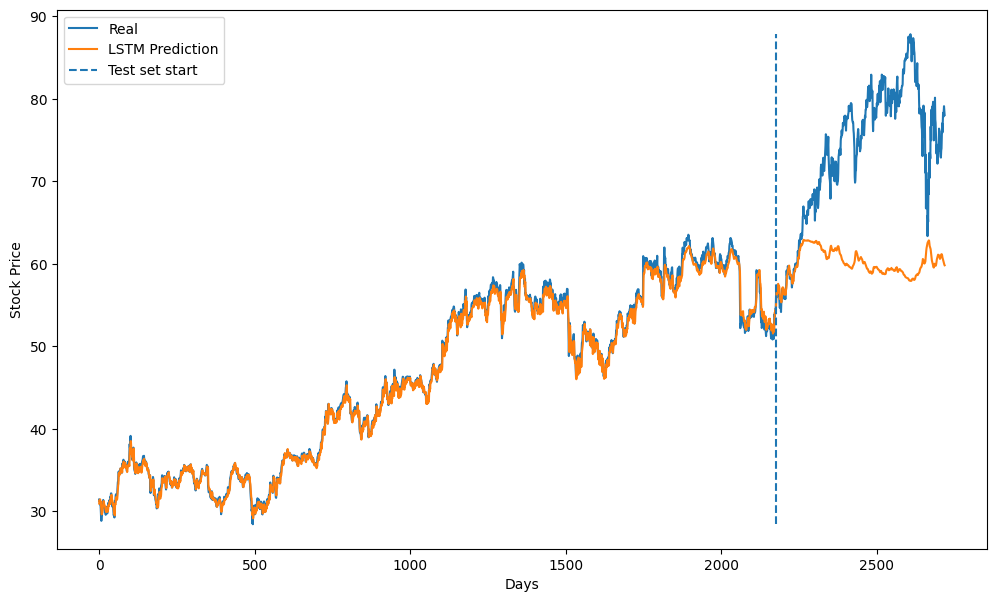

In [55]:
df_out_quantum2 = create_prediction_df(train_val_loader,Qmodel_rx_ry,test_loader)

# IMV_LSTM


Saving model at epoch 0 with validation loss: 0.051539432208306334
Iter: 0, train loss: 0.3009388902562689, val loss: 0.051539432208306334
Iteration 0, lr: 0.025, MSE: 9.955290794372559, MAE: 2.823493480682373


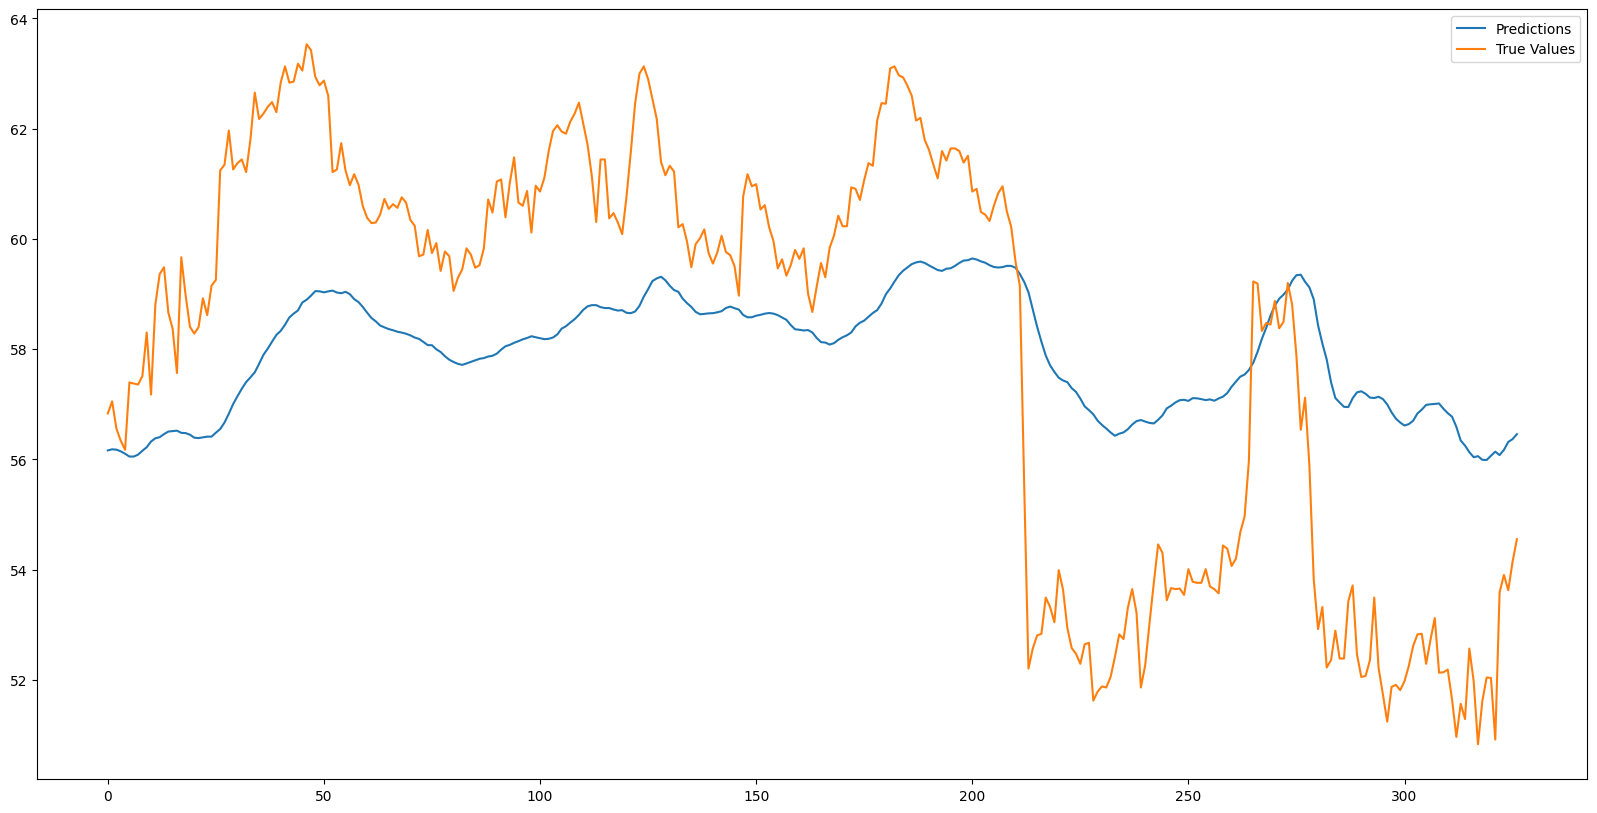

Saving model at epoch 1 with validation loss: 0.051539432208306334
Iter: 1, train loss: 0.11139741475754947, val loss: 0.051539432208306334
Iter: 2, train loss: 0.05926887804007597, val loss: 0.051539432208306334
Saving model at epoch 3 with validation loss: 0.051539432208306334
Iter: 3, train loss: 0.044623589753242994, val loss: 0.051539432208306334
Saving model at epoch 4 with validation loss: 0.051539432208306334
Iter: 4, train loss: 0.03550247468820166, val loss: 0.051539432208306334
Iter: 5, train loss: 0.03257138389788307, val loss: 0.051539432208306334
Iter: 6, train loss: 0.030702453646728287, val loss: 0.051539432208306334
Saving model at epoch 7 with validation loss: 0.051539432208306334
Iter: 7, train loss: 0.030698611274788443, val loss: 0.051539432208306334
Iter: 8, train loss: 0.02901742596366274, val loss: 0.051539432208306334
Saving model at epoch 9 with validation loss: 0.051539432208306334
Iter: 9, train loss: 0.02870340020815035, val loss: 0.051539432208306334
Iter:

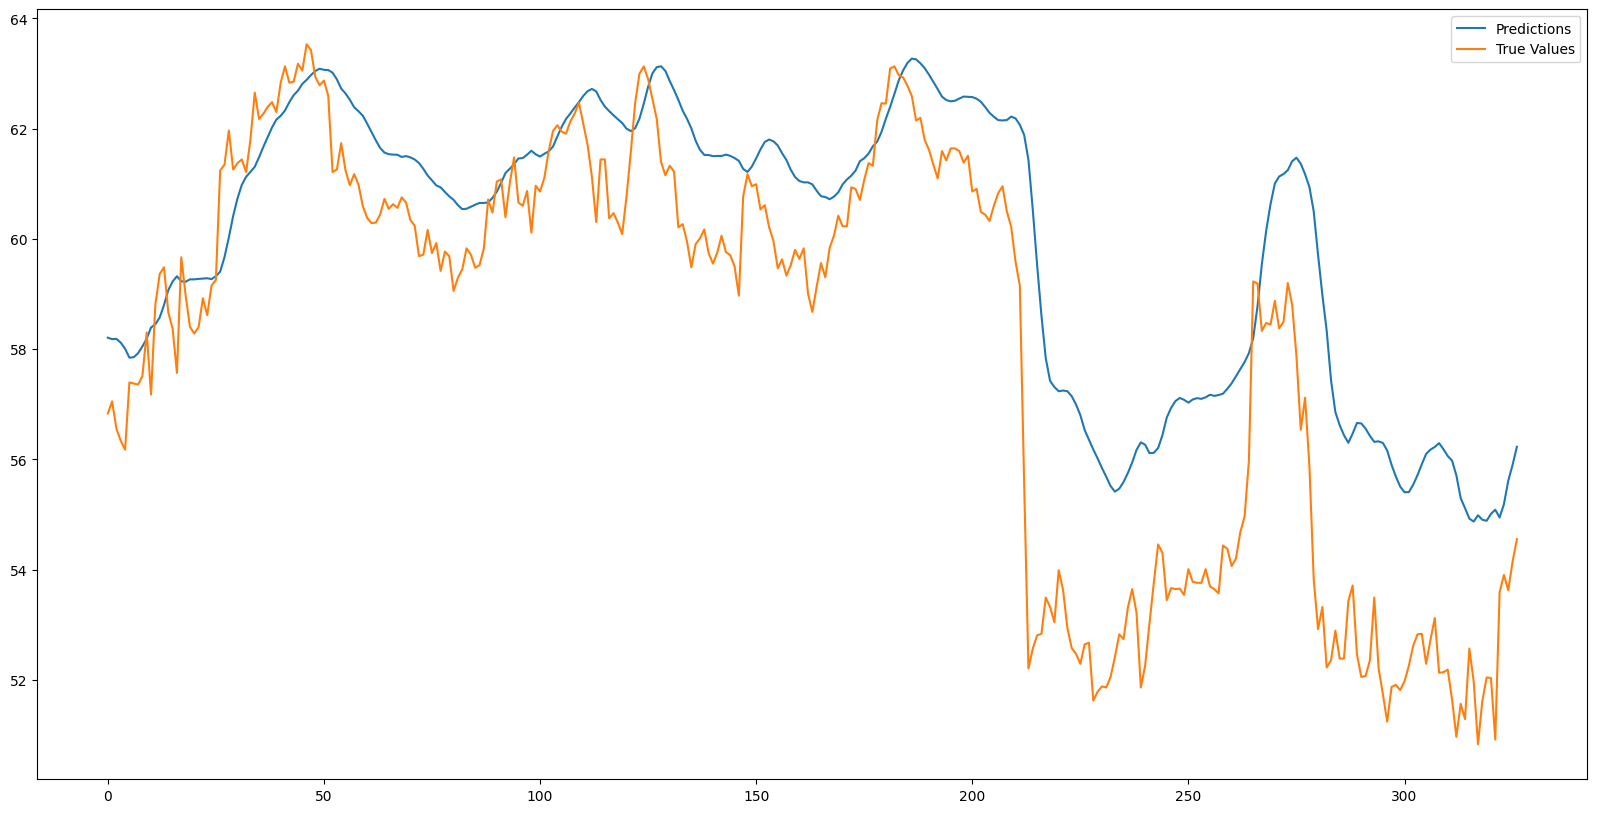

Iter: 21, train loss: 0.02587924650980901, val loss: 0.051539432208306334
Iter: 22, train loss: 0.02526749130240613, val loss: 0.051539432208306334
Iter: 23, train loss: 0.025812539154042663, val loss: 0.051539432208306334
Iter: 24, train loss: 0.029423640084983303, val loss: 0.051539432208306334
Iter: 25, train loss: 0.024992256922755328, val loss: 0.051539432208306334
Iter: 26, train loss: 0.02447215347519734, val loss: 0.051539432208306334
Iter: 27, train loss: 0.024603248628610352, val loss: 0.051539432208306334
Iter: 28, train loss: 0.023491688732139762, val loss: 0.051539432208306334
Iter: 29, train loss: 0.024106972223460407, val loss: 0.051539432208306334
Iter: 30, train loss: 0.0245893741935743, val loss: 0.051539432208306334
Iter: 31, train loss: 0.023890066804186108, val loss: 0.051539432208306334
Iter: 32, train loss: 0.02265201650933539, val loss: 0.051539432208306334
Iter: 33, train loss: 0.025579766008807507, val loss: 0.051539432208306334
Iter: 34, train loss: 0.0234831

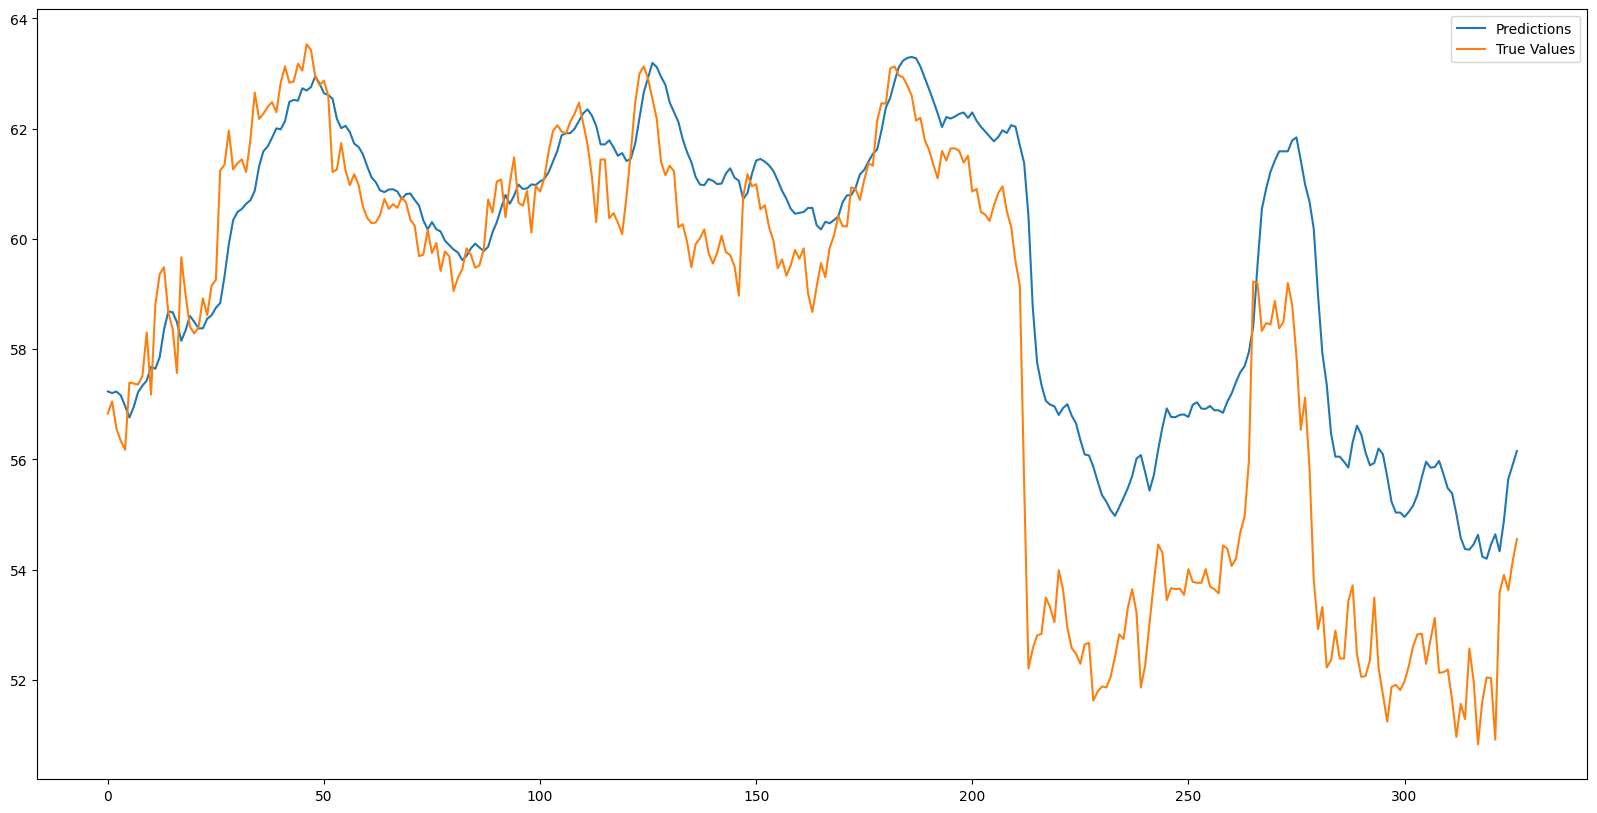

Iter: 41, train loss: 0.020731442375753077, val loss: 0.051539432208306334
Iter: 42, train loss: 0.021451018180566717, val loss: 0.051539432208306334
Iter: 43, train loss: 0.02380149868925743, val loss: 0.051539432208306334
Iter: 44, train loss: 0.019579472962522288, val loss: 0.051539432208306334
Iter: 45, train loss: 0.020118891943021525, val loss: 0.051539432208306334
Iter: 46, train loss: 0.023149742508171332, val loss: 0.051539432208306334
Iter: 47, train loss: 0.02038814482059232, val loss: 0.051539432208306334
Iter: 48, train loss: 0.019503033301865674, val loss: 0.051539432208306334
Iter: 49, train loss: 0.019893590754917957, val loss: 0.051539432208306334
Loaded the best model based on validation loss.


/var/folders/3c/lwpv6l694y7315cz7gxhct1w0000gn/T/ipykernel_14583/1122051002.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  imv_model.load_state_dict(torch.load("imv_te

In [23]:
epochs = 50
loss = nn.MSELoss()
imv_train_losses = []  # List to track training loss
imv_val_losses = []    # List to track validation loss

min_val_loss = 9999  # Initialize to a high value to track best validation loss

imv_model = IMVTensorLSTM(len(features), 1, 16)
opt = torch.optim.Adam(imv_model.parameters(), lr=0.025)

X_train_max = X_train.max(axis=0)
X_train_min = X_train.min(axis=0)
target_train_max = y_train.max(axis=0)
target_train_min = y_train.min(axis=0)

for i in range(epochs):
    mse_train = 0
    for batch_x, batch_y in train_loader:
        opt.zero_grad()
        y_pred, alphas, betas = imv_model(batch_x)
        y_pred = y_pred.squeeze(1)
        l = loss(y_pred, batch_y)
        l.backward()
        mse_train += l.item() * batch_x.shape[0]
        opt.step()

    train_loss = (mse_train / len(X_train_scaled)) ** 0.5
    imv_train_losses.append(train_loss)  # Track the training loss

    # Validation phase
    with torch.no_grad():
        mse_val = 0
        preds = []
        true = []
        for batch_x, batch_y in val_loader:
            output, alphas, betas = imv_model(batch_x)
            output = output.squeeze(1)
            preds.append(output.detach().cpu().numpy())
            true.append(batch_y.detach().cpu().numpy())
            mse_val += loss(output, batch_y).item() * batch_x.shape[0]

    imv_val_loss = (mse_val / len(X_val_scaled)) ** 0.5
    imv_val_losses.append(imv_val_loss)  # Track the validation loss

    # Saving the best model based on validation loss
    if imv_val_loss < min_val_loss:
        min_val_loss = imv_val_loss
        print(f"Saving model at epoch {i} with validation loss: {val_loss}")
        torch.save(imv_model.state_dict(), "imv_tensor_lstm_best_model.pt")

    print(f"Iter: {i}, train loss: {train_loss}, val loss: {val_loss}")

    # Inverse scaling if necessary every 20 epochs
    if i % 20 == 0:
        preds = np.concatenate(preds)
        true = np.concatenate(true)

        target_train_max = y_train.max().item()
        target_train_min = y_train.min().item()

        preds = target_scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
        true = target_scaler.inverse_transform(true.reshape(-1, 1)).flatten()

        # Compute metrics
        mse = mean_squared_error(true, preds)
        mae = mean_absolute_error(true, preds)

        print(f"Iteration {i}, lr: {opt.param_groups[0]['lr']}, MSE: {mse}, MAE: {mae}")

        plt.figure(figsize=(20, 10))
        plt.plot(preds, label='Predictions')
        plt.plot(true, label='True Values')
        plt.legend()
        plt.show()
# Loading the best model after training
imv_model.load_state_dict(torch.load("imv_tensor_lstm_best_model.pt"))
print("Loaded the best model based on validation loss.")


In [56]:
imv_model.load_state_dict(torch.load("imv_tensor_lstm_nasdaq.pt"))


/var/folders/3c/lwpv6l694y7315cz7gxhct1w0000gn/T/ipykernel_10603/1866686491.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  imv_model.load_state_dict(torch.load("imv_ten

<All keys matched successfully>

In [24]:

import numpy as np
import torch

# Prediction function to return alphas, betas, and predictions
def predict_imv_lstm(data_loader, model):
    preds = []
    alphas = []
    betas = []

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for batch_x, _ in data_loader:
            output, a, b = model(batch_x)
            output = output.squeeze(1)
            
            preds.append(output.detach().cpu().numpy())
            alphas.append(a.detach().cpu().numpy())
            betas.append(b.detach().cpu().numpy())
    
    # Concatenate predictions, alphas, and betas
    preds = np.concatenate(preds)
    alphas = np.concatenate(alphas)
    betas = np.concatenate(betas)

    return preds, alphas, betas



      Close_lead1  Model forecast
0       31.440840       31.056898
1       31.183207       31.096266
2       31.364504       31.127747
3       30.839695       31.195906
4       30.944656       31.218172
...           ...             ...
2712    77.814888       71.162643
2713    78.492363       71.331306
2714    79.103050       71.546410
2715    78.492363       71.840042
2716    78.024811       71.993675

[2719 rows x 2 columns]
Mean Squared Error (MSE): 6.0669
R-squared (R²): 0.9719
Mean Absolute Percentage Error (MAPE): 2.49%


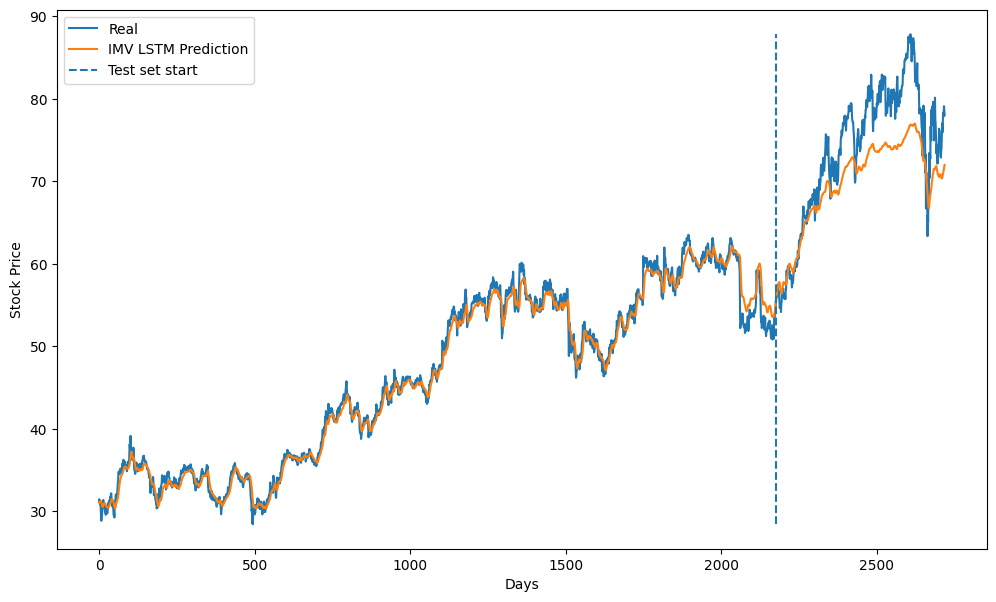

In [25]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Prediction function for IMV LSTM to return preds, alphas, and betas
def predict_imv_lstm(data_loader, model):
    preds = []
    alphas = []
    betas = []
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for batch_x, _ in data_loader:
            output, a, b = model(batch_x)
            output = output.squeeze(1)
            
            preds.append(output.detach().cpu().numpy())
            alphas.append(a.detach().cpu().numpy())
            betas.append(b.detach().cpu().numpy())
    
    # Concatenate predictions and attention outputs
    preds = np.concatenate(preds)
    alphas = np.concatenate(alphas)
    betas = np.concatenate(betas)
    
    return preds, alphas, betas

# # Concatenate training and validation datasets
df_train_val = pd.concat([df_train_scaled, df_val_scaled])

# Create a DataLoader for the concatenated training and validation set
train_val_dataset = TimeSeriesDataset(df_train_val, target=target, features=features, sequence_length=sequence_length)
train_val_loader = DataLoader(train_val_dataset, batch_size=batch_size, shuffle=False)

# Perform prediction on the training and validation concatenated set
preds_train_val, alphas_train_val, betas_train_val = predict_imv_lstm(train_val_loader, imv_model)

# Perform prediction on the test set
preds_test, alphas_test, betas_test = predict_imv_lstm(test_loader, imv_model)

# Concatenate predictions for train+validation and test
df_train_val[ystar_col] = preds_train_val.reshape(-1)
df_test_scaled[ystar_col] = preds_test.reshape(-1)

# Concatenate predictions for train+validation and test
df_out_imv = pd.concat([df_train_val, df_test_scaled])[[target, ystar_col]]

# Perform inverse transform on the concatenated predictions (undo the scaling)
df_out_imv[target] = target_scaler.inverse_transform(df_out_imv[[target]])
df_out_imv[ystar_col] = target_scaler.inverse_transform(df_out_imv[[ystar_col]])

# Print the resulting DataFrame
print(df_out_imv)

# Process alphas and betas
alphas_combined = np.concatenate([alphas_train_val, alphas_test], axis=0)
betas_combined = np.concatenate([betas_train_val, betas_test], axis=0)

# Mean alphas and betas
alphas_mean = alphas_combined.mean(axis=0)
betas_mean = betas_combined.mean(axis=0)

# Further processing to match the desired shape
alphas_mean = alphas_mean[..., 0]
betas_mean = betas_mean[..., 0]
alphas_mean = alphas_mean.transpose(1, 0)


# Evaluate the model
evaluate_model(df_out_imv, target, ystar_col)

# Plot the real vs predicted values
plt.figure(figsize=(12, 7))
plt.plot(range(len(df_out_imv)), df_out_imv[target], label="Real")
plt.plot(range(len(df_out_imv)), df_out_imv[ystar_col], label="IMV LSTM Prediction")

# Customize the plot
plt.ylabel('Stock Price')
plt.xlabel('Days')
plt.vlines(len(df_train_val), ymin=df_out_imv[target].min(), ymax=df_out_imv[target].max(), label="Test set start", linestyles="dashed")
plt.legend()
plt.show()


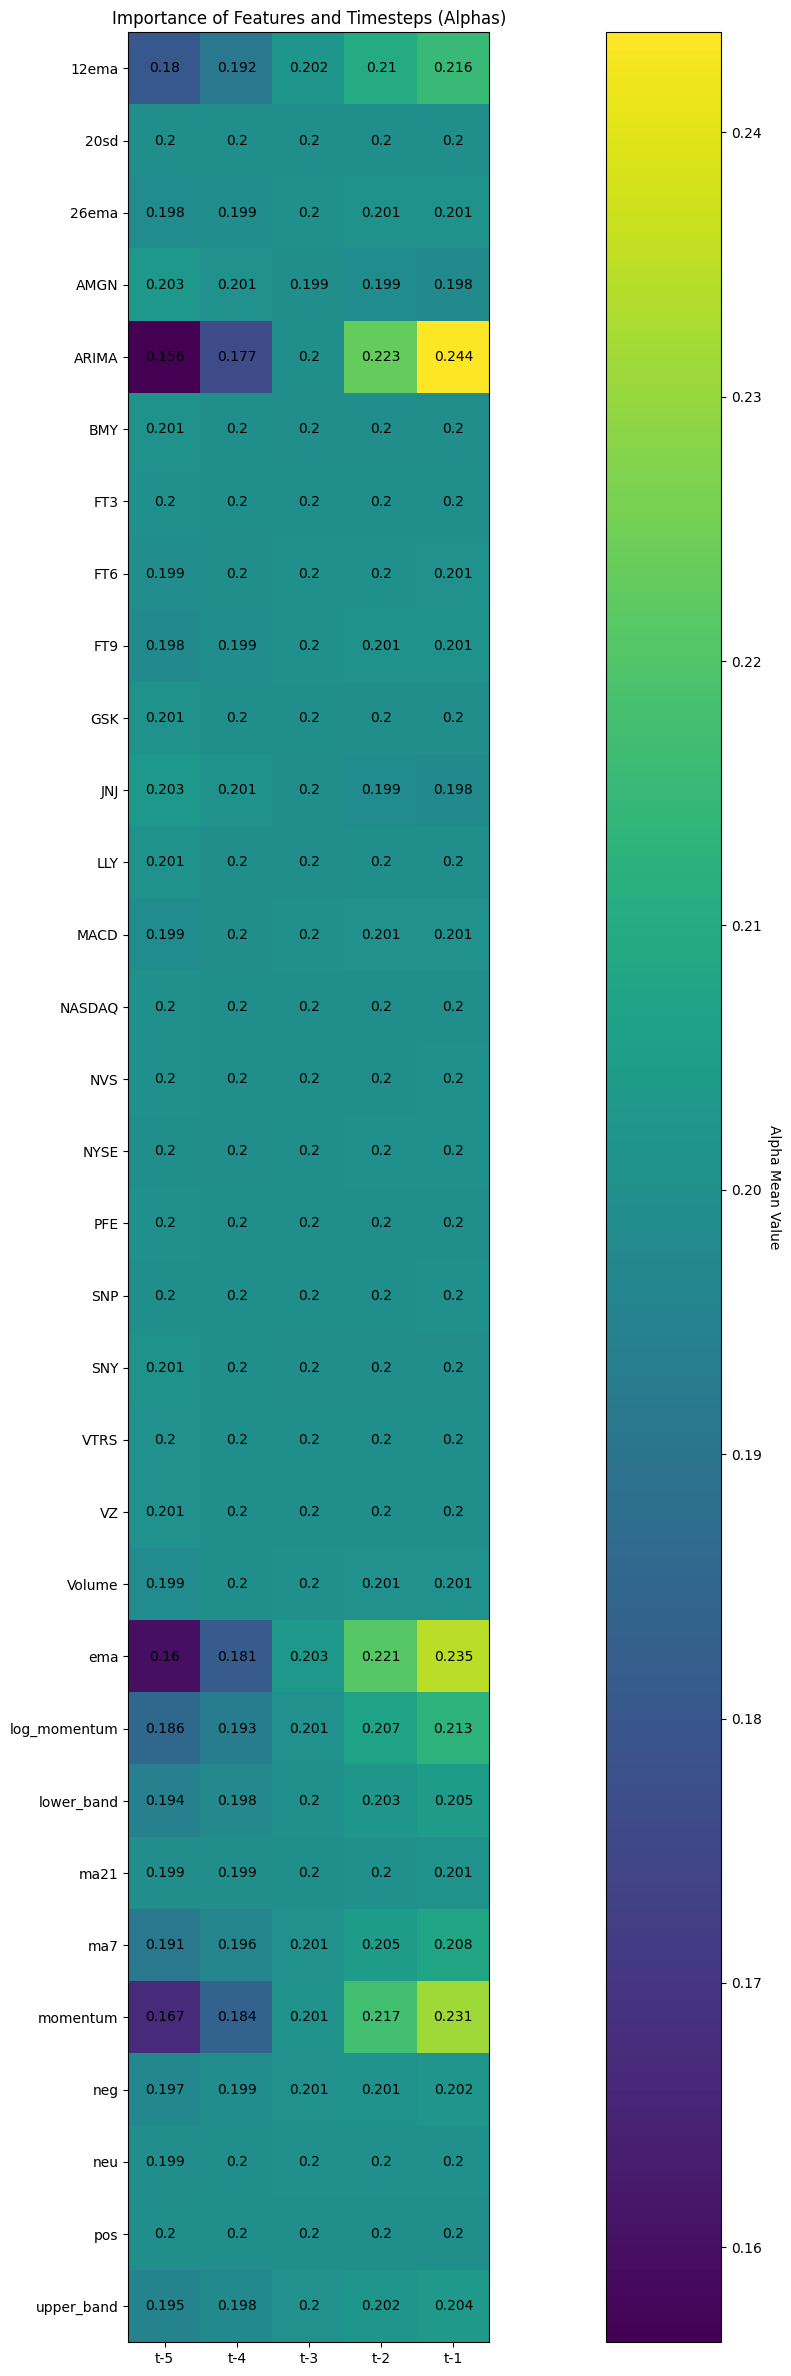

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `alphas_mean` is already calculated from your data
# Further processing of `alphas_mean` for plotting

alphas_mean = alphas_train_val.mean(axis=0)
betas_mean = betas_train_val.mean(axis=0)

# Step 3: Further processing to match the shape for plotting
alphas_mean = alphas_mean[..., 0]  # Drop last dimension if it exists
alphas_mean = alphas_mean.transpose(1, 0)  # Transpose alphas for the plot

# Assuming X_train has the 2D shape before conversion
n_features = len(features)  # Number of features (columns)
n_timesteps = 5  # Number of timesteps in the sequence

# Step 4: Plot the alphas matrix (importance of features across timesteps)
fig, ax = plt.subplots(figsize=(30, 30))
im = ax.imshow(alphas_mean)  # Use a color map for better contrast

# Step 5: Set the tick labels
ax.set_xticks(np.arange(n_timesteps))  # Timesteps
ax.set_yticks(np.arange(n_features))   # Features

# Labels for x and y ticks
ax.set_xticklabels([f"t-{i}" for i in np.arange(n_timesteps, 0, -1)])  # Timesteps
ax.set_yticklabels(features)  # Feature names

# Step 6: Add annotations (values) inside the heatmap cells
for i in range(n_features):
    for j in range(n_timesteps):
        text = ax.text(j, i, round(alphas_mean[i, j], 3),
                       ha="center", va="center", color="black")

# Step 7: Add a color bar to show the levels of the matrix
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Alpha Mean Value", rotation=-90, va="bottom")

# Add title to the plot
ax.set_title("Importance of Features and Timesteps (Alphas)")

# Show plot
plt.show()


The provided **IMV-LSTM** result demonstrates the importance of features over different timesteps (denoted as alphas) for stock price prediction. Each cell represents the contribution (importance) of a specific feature at a given timestep. 

### Key Features:
1. **12ema, 26ema, and ema**:
   - These exponential moving averages show moderate-to-high importance across timesteps, with **ema** increasing in importance as it approaches, indicating its strong influence on predictions near the target time. The importance of **12ema** also increases over time, showing that short-term trends become more relevant as we approach the prediction time.

2. **ARIMA**:
   - ARIMA shows a notable increase in importance when the sequence reaches the end stage, suggesting it plays a critical role in predicting future stock prices, especially as the prediction time draws near. This spike could indicate ARIMA’s strength in capturing short-term patterns.

3. **Momentum**:
   - Momentum is a key feature, with increasing importance toward the final time step. Its high values around final indicate that it is crucial in predicting stock price movements, as momentum often reflects the market’s current direction.

4. **log_momentum**:
   - Similar to momentum, **log_momentum** shows increasing importance over time, confirming that the model relies heavily on momentum-based features for predictions.

5. **Technical Indicators (ma7, ma21, lower_band)**:
   - **ma7** and **ma21** (moving averages) maintain steady importance across timesteps, with **ma7** showing a gradual increase in influence as model approach end sequence. This suggests that short-term moving averages (ma7) play a more significant role than medium-term averages (ma21).
   - **Lower_band** also shows growing importance over time, indicating its role in identifying support levels for stock prices.

6. **Volume**:
   - Volume displays relatively consistent importance, slightly increasing closer to the prediction time. This reflects the model’s reliance on trading volume for making short-term predictions.

7. **Sentiment Features (neg, neu, pos)**:
   - Sentiment features, particularly **neu** and **neg**, maintain steady importance across timesteps, suggesting that while they are used by the model, they do not show major shifts in importance based on time proximity to prediction.

### Notable Patterns:
- **Increasing Importance Near t-1**: Features like **ema**, **momentum**, and **ARIMA** show the highest importance near **t-1**, highlighting that the model relies heavily on these features just before making predictions.
- **Relatively Steady Features**: Features such as **ma21**, **lower_band**, **neu**, and **volume** maintain consistent importance across all timesteps, indicating that they play a background role throughout the time series.
- **Lesser Important Features**: Some features, like **upper_band** and stock-specific features (e.g., **AMGN**, **BMY**), show lower overall importance across all timesteps.

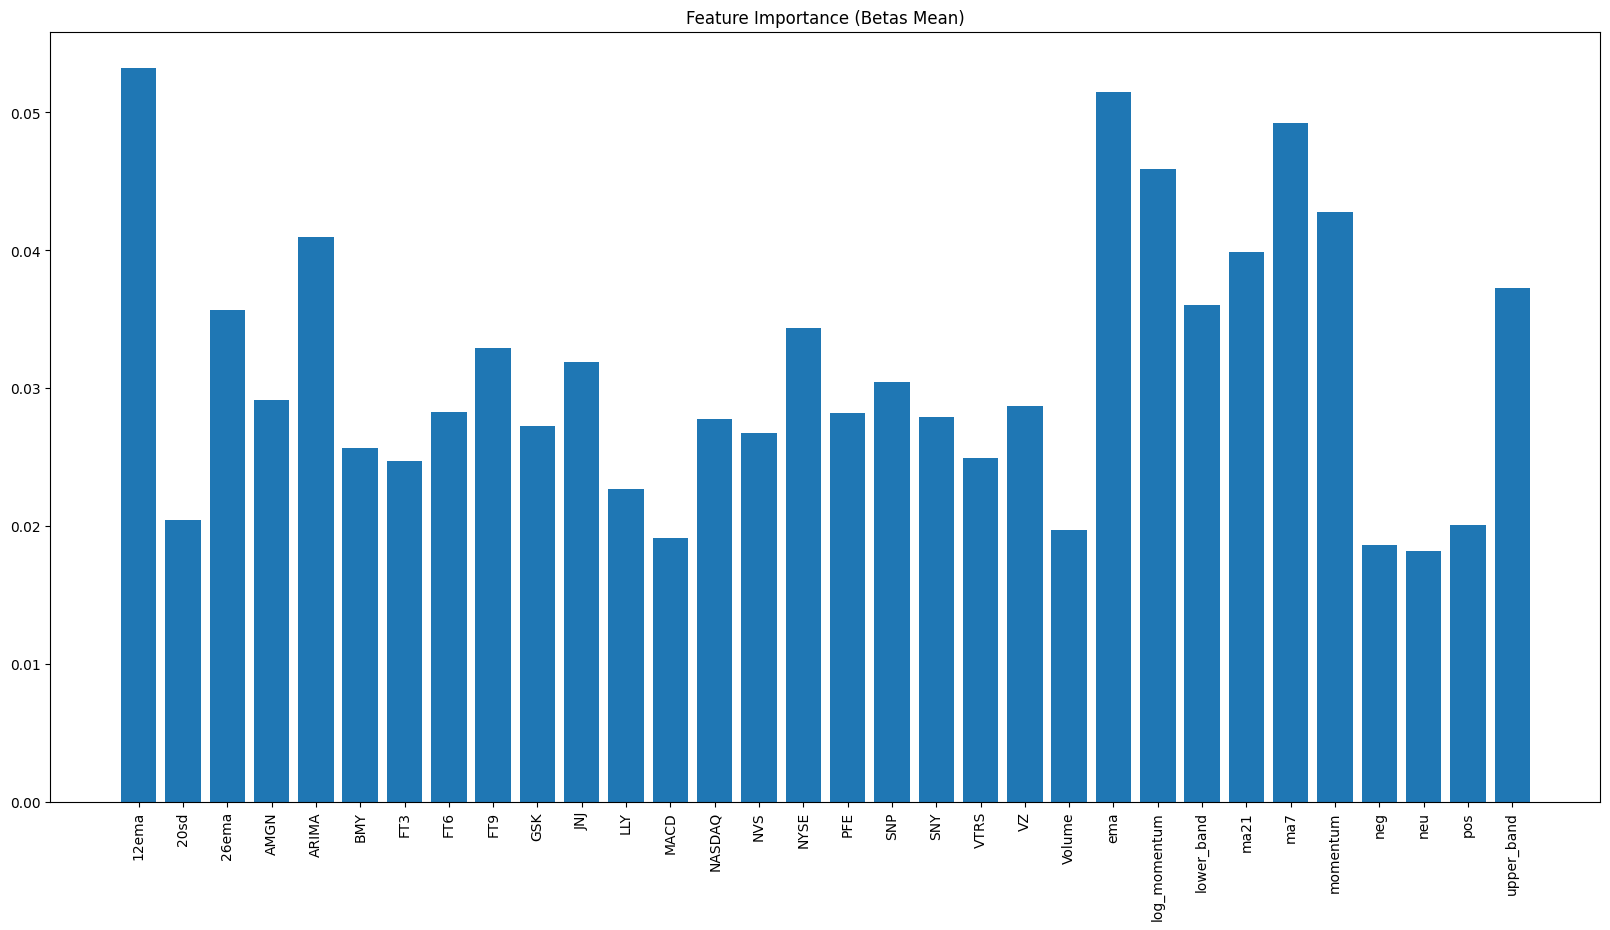

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `betas_mean` has already been computed and contains the importance of features

# Example: betas_mean is calculated from alphas_train_val.mean(axis=0)
betas_mean = betas_train_val.mean(axis=0)

# Further processing of betas_mean for plotting
betas_mean = betas_mean[..., 0]  # Remove last dimension if necessary

# Number of features
n_features = len(features)  # Assuming `features` contains your feature names

# Plot feature importance based on `betas_mean`
plt.figure(figsize=(20, 10))  # Adjusted to a more standard aspect ratio for bar plots
plt.title("Feature Importance (Betas Mean)")

# Create a bar plot for feature importance
plt.bar(range(n_features), betas_mean)

# Set feature names as x-tick labels, rotated for readability
plt.xticks(ticks=range(n_features), labels=features, rotation=90)

# Show the plot
plt.show()


# Comparison 

Finally, all of the models are trained and giving us preliminary results,here I will create detail evaluation and comparison of those results, by plotting them all on the same graph to see how they perform against each other. In this part, the following analysis will be performance. 

1. Compare the predictions of the models
2. Compare the loss per epoch for both training and test loss of 3 models 
3. Discuss Complexity analysis, and compare number of parameters

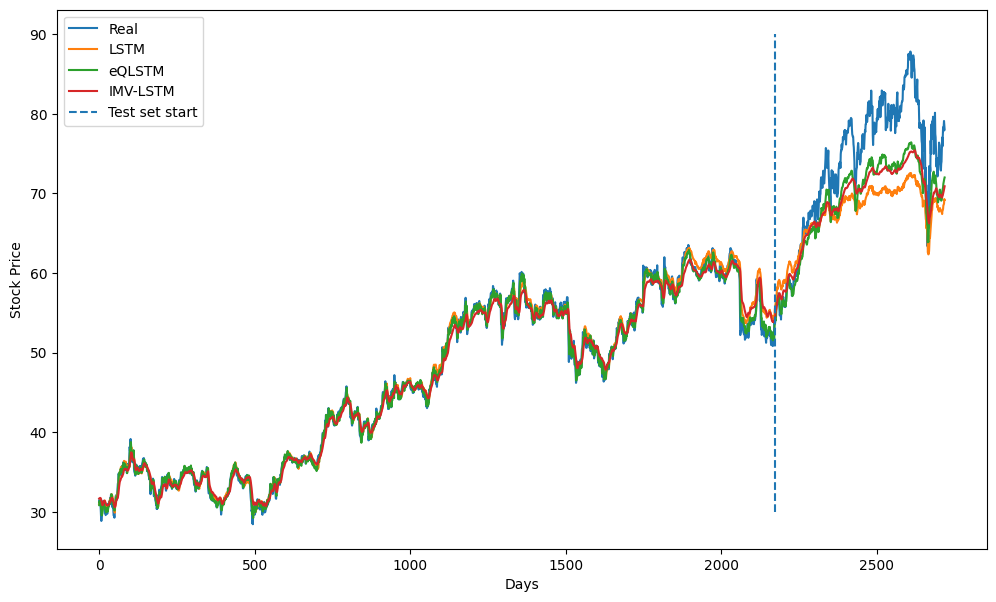

In [60]:
plt.figure(figsize=(12, 7))
plt.plot(range(2719), df_out_classical["Close_lead1"], label = "Real")
plt.plot(range(2719), df_out_classical["Model forecast"], label = "LSTM")
plt.plot(range(2719), df_out_quantum_crx ["Model forecast"], label = "eQLSTM")
plt.plot(range(2719), df_out_imv["Model forecast"], label = "IMV-LSTM")

plt.ylabel('Stock Price')
plt.xlabel('Days')
plt.vlines(2173, ymin = 30, ymax = 90, label = "Test set start", linestyles = "dashed")
plt.legend()
plt.show()

In the image above the plot illustrate the stock price predictions of three models—LSTM, enhanced QLSTM (eQLSTM), and IMV-LSTM—compared to real stock prices over approximately 2700 days from 2009 to 2020. 

Key Observations:

Pre-Test Period (Training Phase): During the training phase (before day 2000), all the models seem to learn effectively and can be able ot capture the relationship of the data, this can be seen as all of the lines are very close to the true values.  

Test Period (Post-2000 Days): After the test set begins, the real stock price becomes more unpredictable. Of all the models, eQLSTM (green line) demonstrates the best performance in capturing the overall stock price trends and movements, even during sharp peaks and dips, it gives the nearest forecasting values compared to others. Besides, IMV-LSTM (red line) also performs well but lags slightly behind eQLSTM. Meanwhile, the LSTM (orange line) struggles the most, showing significant deviations from the real price, particularly in the volatile test phase.

The result can confirm the capability of learning of eQLSTM in capturing complex data and demonstrating as very potential model, it is among the top performer, providing more accurate predictions and better tracking of stock price movements, especially during the test period. 

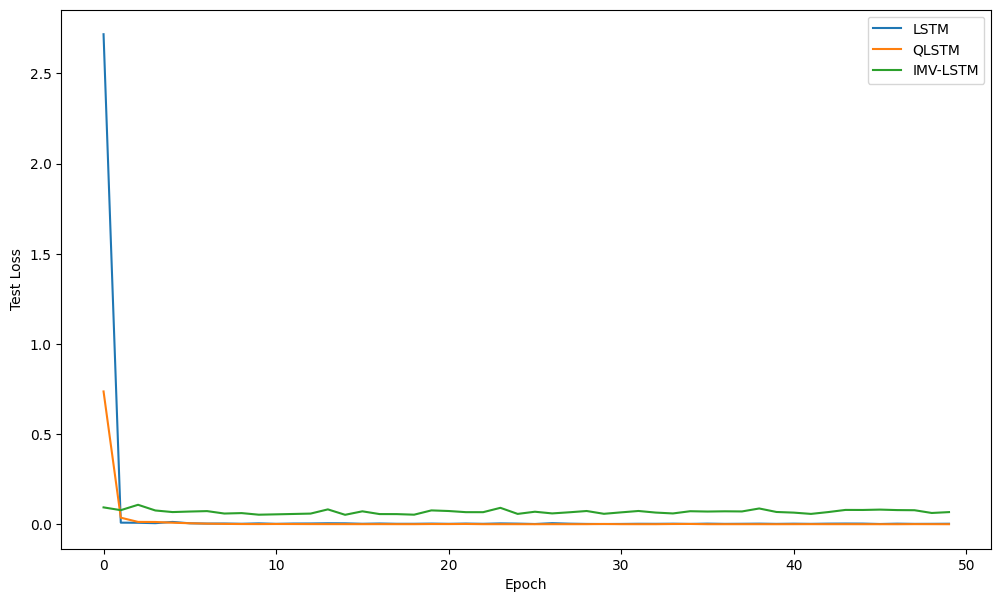

In [30]:
plt.figure(figsize=(12, 7))
plt.plot(range(50), classical_loss_test[0:50], label = "LSTM")
plt.plot(range(50), quantum_loss_test[0:50], label = "QLSTM")
plt.plot(range(50), imv_val_losses, label = "IMV-LSTM")

plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Complexity Analysis:

In the final comparison, the complexity of QLSTM is analyzed, focusing on the number of parameters used in QLSTM compared to LSTM. The goal is to create realistic model that can be implemened on real quantum computers, so it's important to evaluate its feasibility in terms of required gates and qubits. Early QLSTM versions demonstrate that using a small number of qubits (e.g., 6) is possible by sandwiching the quantum circuit between classical layers, and can have good ability to learn the complex data, with 32 features in total. These classical layers handle input and output size conversions, similar to the approach in dressed quantum circuits as discussed in the study on hybrid classical-quantum neural networks.

In the NISQ (Noisy Intermediate-Scale Quantum) era, this approach will likely continue, though increasing qubit counts may enhance performance. Regarding circuit depth, the depth grows linearly with the number of qubits and layers which can be calculated following this formula 3 + n1x(2nq+3), where n1 is the number of layers and nq is the number of qubits.  This makes QLSTM be manageable and suitable for NISQ hardware. Even with minimal layers and qubits, good results are achievable, highlighting QLSTM's potential. 



In [64]:
total_params = sum(p.numel() for p in classical_model.parameters() if p.requires_grad)
total_params_Q = sum(p.numel() for p in Qmodel.parameters() if p.requires_grad)
total_params_Q2 = sum(p.numel() for p in Qmodel_rx_ry.parameters() if p.requires_grad)
total_params_Q3 = sum(p.numel() for p in Qmodel_cnot.parameters() if p.requires_grad)
total_params_imv = sum(p.numel() for p in imv_model.parameters() if p.requires_grad)


print("No. of parameters for Classical LSTM: ", total_params)
print("No. of parameters for QLSTM amplitude embedding + CRX: ", total_params_Q)
print("No. of parameters for QLSTM amplitude + CNOT: ", total_params_Q2)
print("No. of parameters for QLSTM RX RY + CRX: ", total_params_Q3)
print("No. of parameters for IMV - LSTM ", total_params_imv)



No. of parameters for Classical LSTM:  3217
No. of parameters for QLSTM amplitude embedding + CRX:  2047
No. of parameters for QLSTM amplitude + CNOT:  2047
No. of parameters for QLSTM RX RY + CRX:  2047
No. of parameters for QLSTM RX RY + CRX:  37474


The Pytorch implementation of LSTM uses a large number of parameters for training while eQLSTM requires about 1.6 times fewer parameters. This shows that the eQLSTM model have a good advantagoues in trainability where a smaller number of parameter is needed. In addition, although the IMV-LSTM offers a great interprebility for the model, it requires a very huge number of parameters which is not a good choice in case where training resource is limited or very huge number of data used. 

# Conclusion and Future Works:

In this notebook, I explored the proof of concept that QLSTM, especially the enhanced version (eQLSTM), can be an effective model for stock prediction. It provides comparable results to classical LSTM while requiring significantly fewer parameters and extracting more information per epoch. The results suggest that this novel algorithm is promising for financial applications and can be extended to other time-series tasks, such as renewable energy prediction (Cao et al.) or physical activity energy expenditure estimation (Nhi et al.).

### Improvements on Current Model:

Due to time constraints, I utilized relatively basic neural network techniques, such as a fixed learning rate, a large number of features, and a short sequence length for faster processing. However, studies show that using a learning rate scheduler, adding momentum, and incorporating regularization techniques can greatly improve model performance. Further, applying more advanced feature engineering and selection strategies could lead to better results, offering numerous opportunities for refinement.

### Future Works:

Moving forward, I aim to implement more advanced techniques like learning rate schedulers and using larger datasets to provide richer training data, which will enhance model performance. Additionally, I plan to explore quantum versions of advanced machine learning algorithms such as Quantum GANs and Quantum Transformers to fully harness the potential of quantum computing in handling complex patterns and large datasets, offering the possibility of higher performance compared to classical methods.